# Data Understanding Feature Engineering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [26]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   race_url                      589865 non-null  object        
 1   race_name                     589865 non-null  object        
 2   points                        589388 non-null  float64       
 3   uci_points                    251086 non-null  float64       
 4   length                        589865 non-null  float64       
 5   climb_total                   442820 non-null  float64       
 6   profile                       441671 non-null  float64       
 7   startlist_quality             589865 non-null  int64         
 8   date                          589865 non-null  datetime64[ns]
 9   position                      589859 non-null  float64       
 10  cyclist_url                   589865 non-null  object        
 11  cyclist_age  

In [28]:
'''
cyclist_climb_power
cyclist_previous_experience SUS
cyclist_days_since_last_race SUS
race_physical_effort
race_season
race_prestige
'''

'\ncyclist_climb_power\ncyclist_previous_experience SUS\ncyclist_days_since_last_race SUS\nrace_physical_effort\nrace_season\nrace_prestige\n'

### BMI Attribute

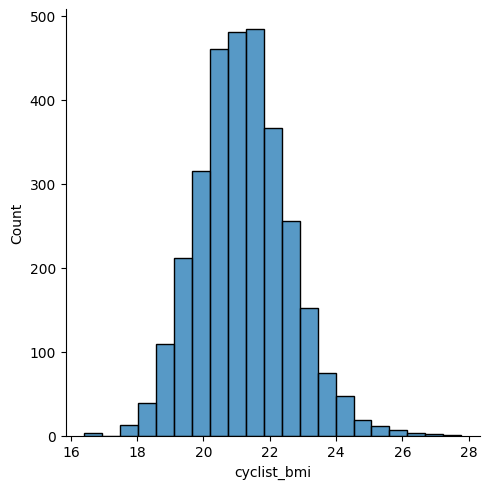

In [29]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_bmi', 'cyclist_url']), 
                x="cyclist_bmi", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

<Axes: xlabel='cyclist_bmi', ylabel='cyclist_age_group'>

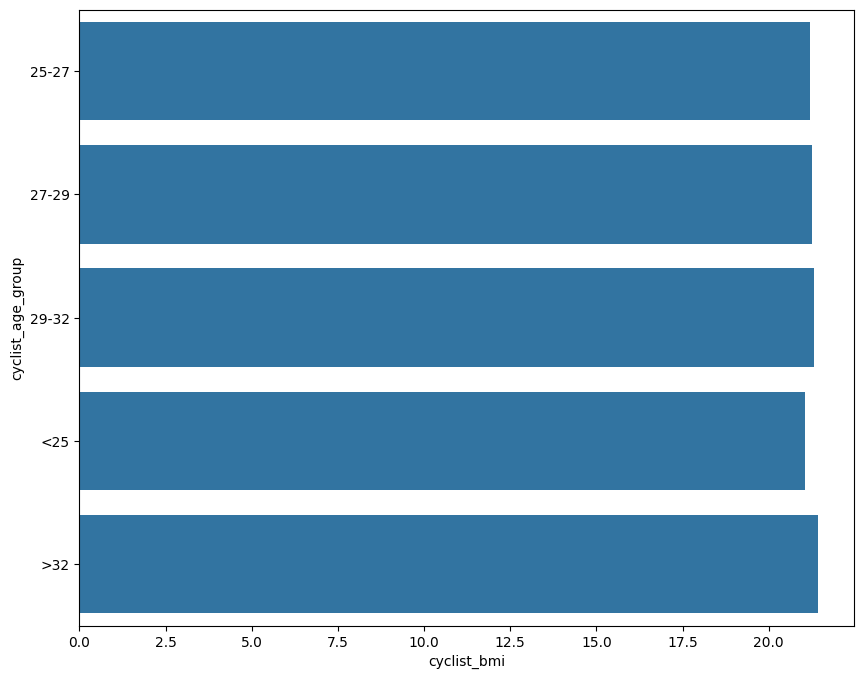

In [30]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset['cyclist_age_group'],
    'cyclist_bmi': dataset['cyclist_bmi'],
    'cyclist_url': dataset['cyclist_url'],
    'race_name': dataset['race_name'],
    'year': dataset['date'].dt.year,
}).drop_duplicates(subset=['cyclist_url', 'race_name', 'year']) # vogliamo considerare ogni ciclista una sola volta per ogni edizione di una gara

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_bmi'].mean().reset_index()

plt.figure(figsize=(10, 8))
sb.barplot(y='cyclist_age_group', x='cyclist_bmi', data=tmp_mean[tmp_mean['cyclist_bmi'].notnull()], orient='h')

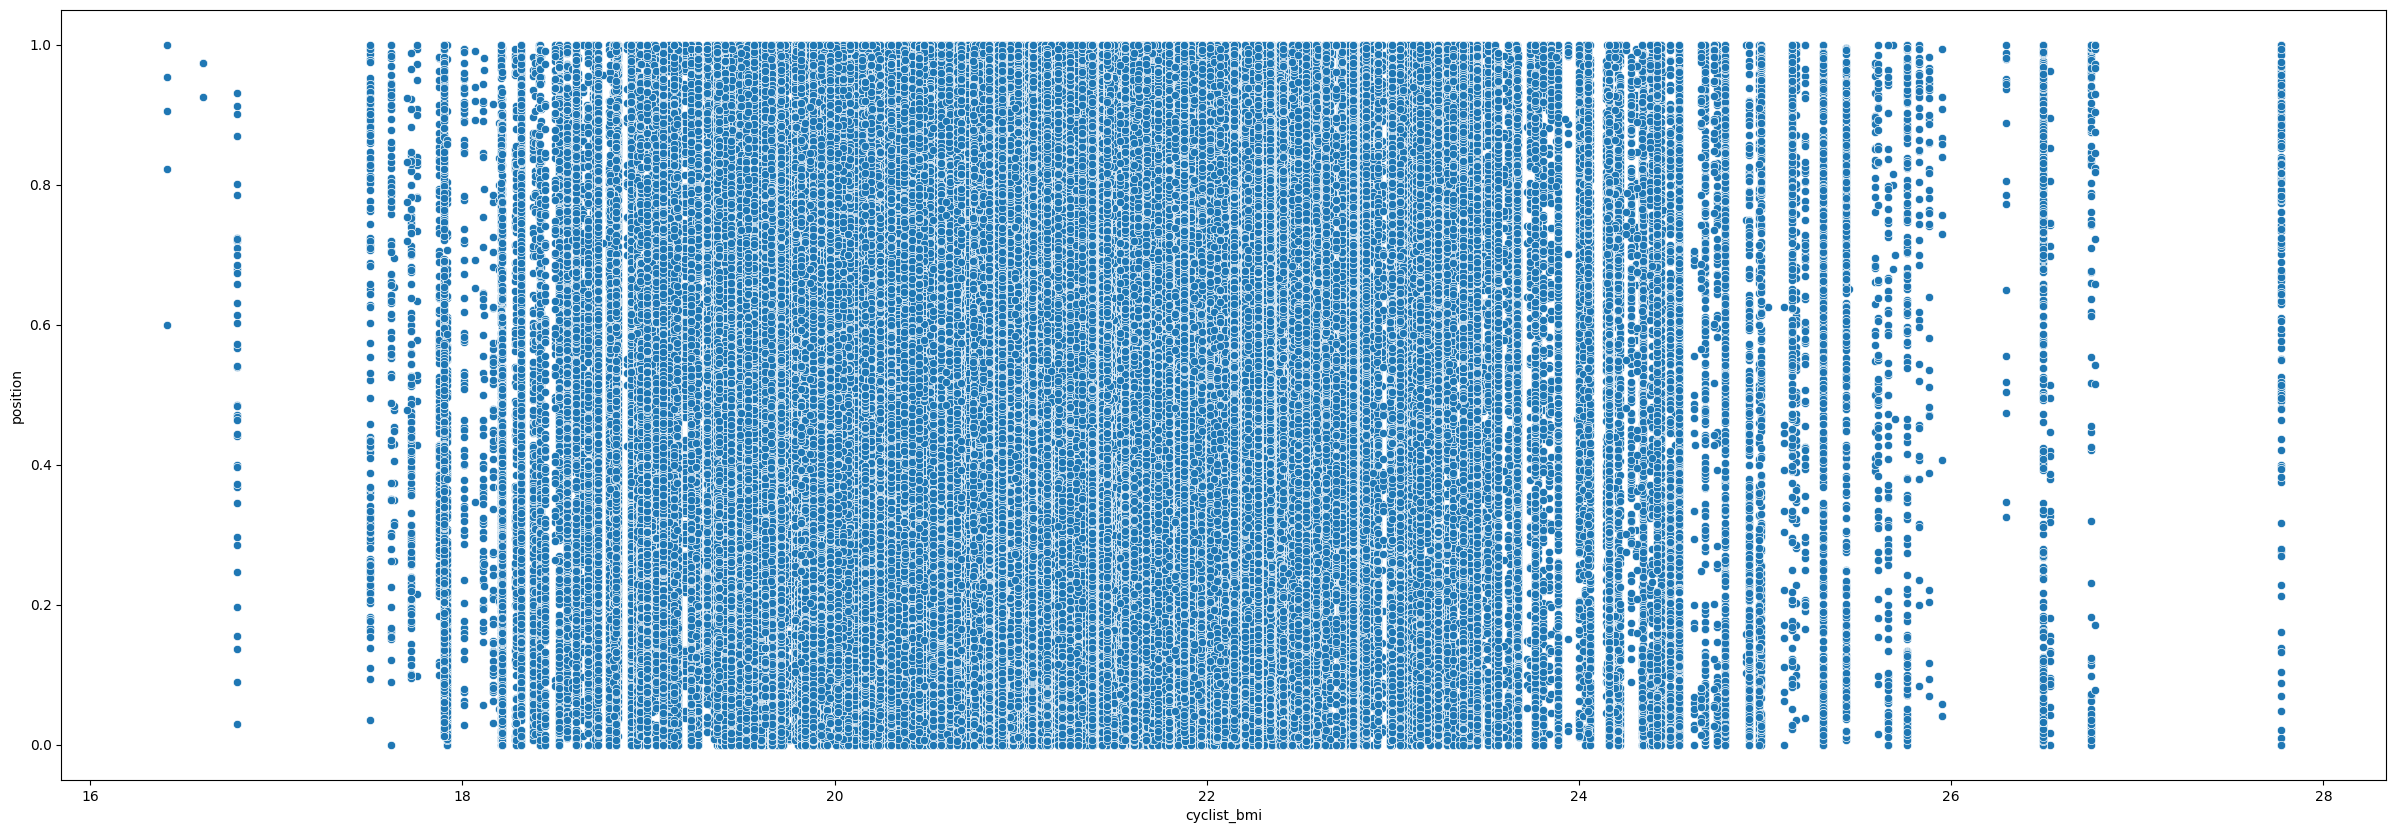

In [31]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='position', data=dataset)
plt.show()

nessuna correlazione evidente

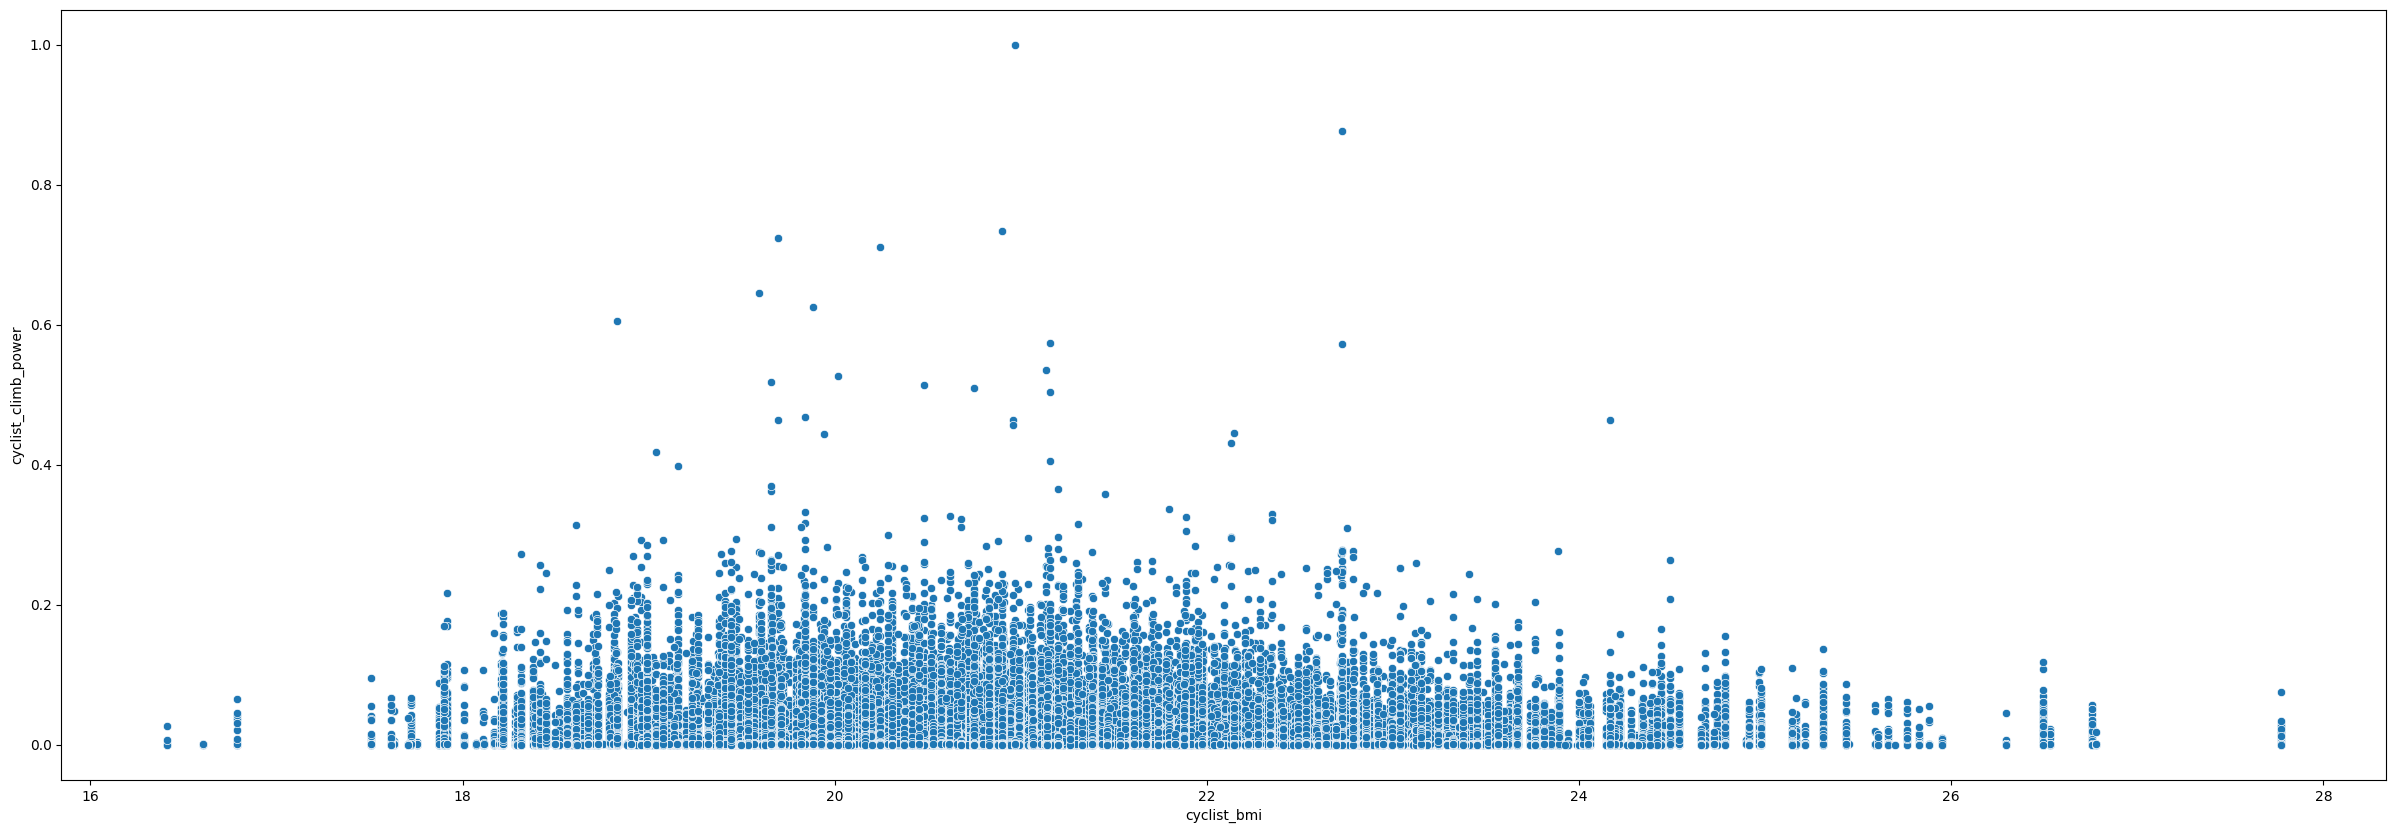

In [32]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='cyclist_climb_power', data=dataset)
plt.show()

Nota forma a campana, bmi medio sembra consentire power maggiori

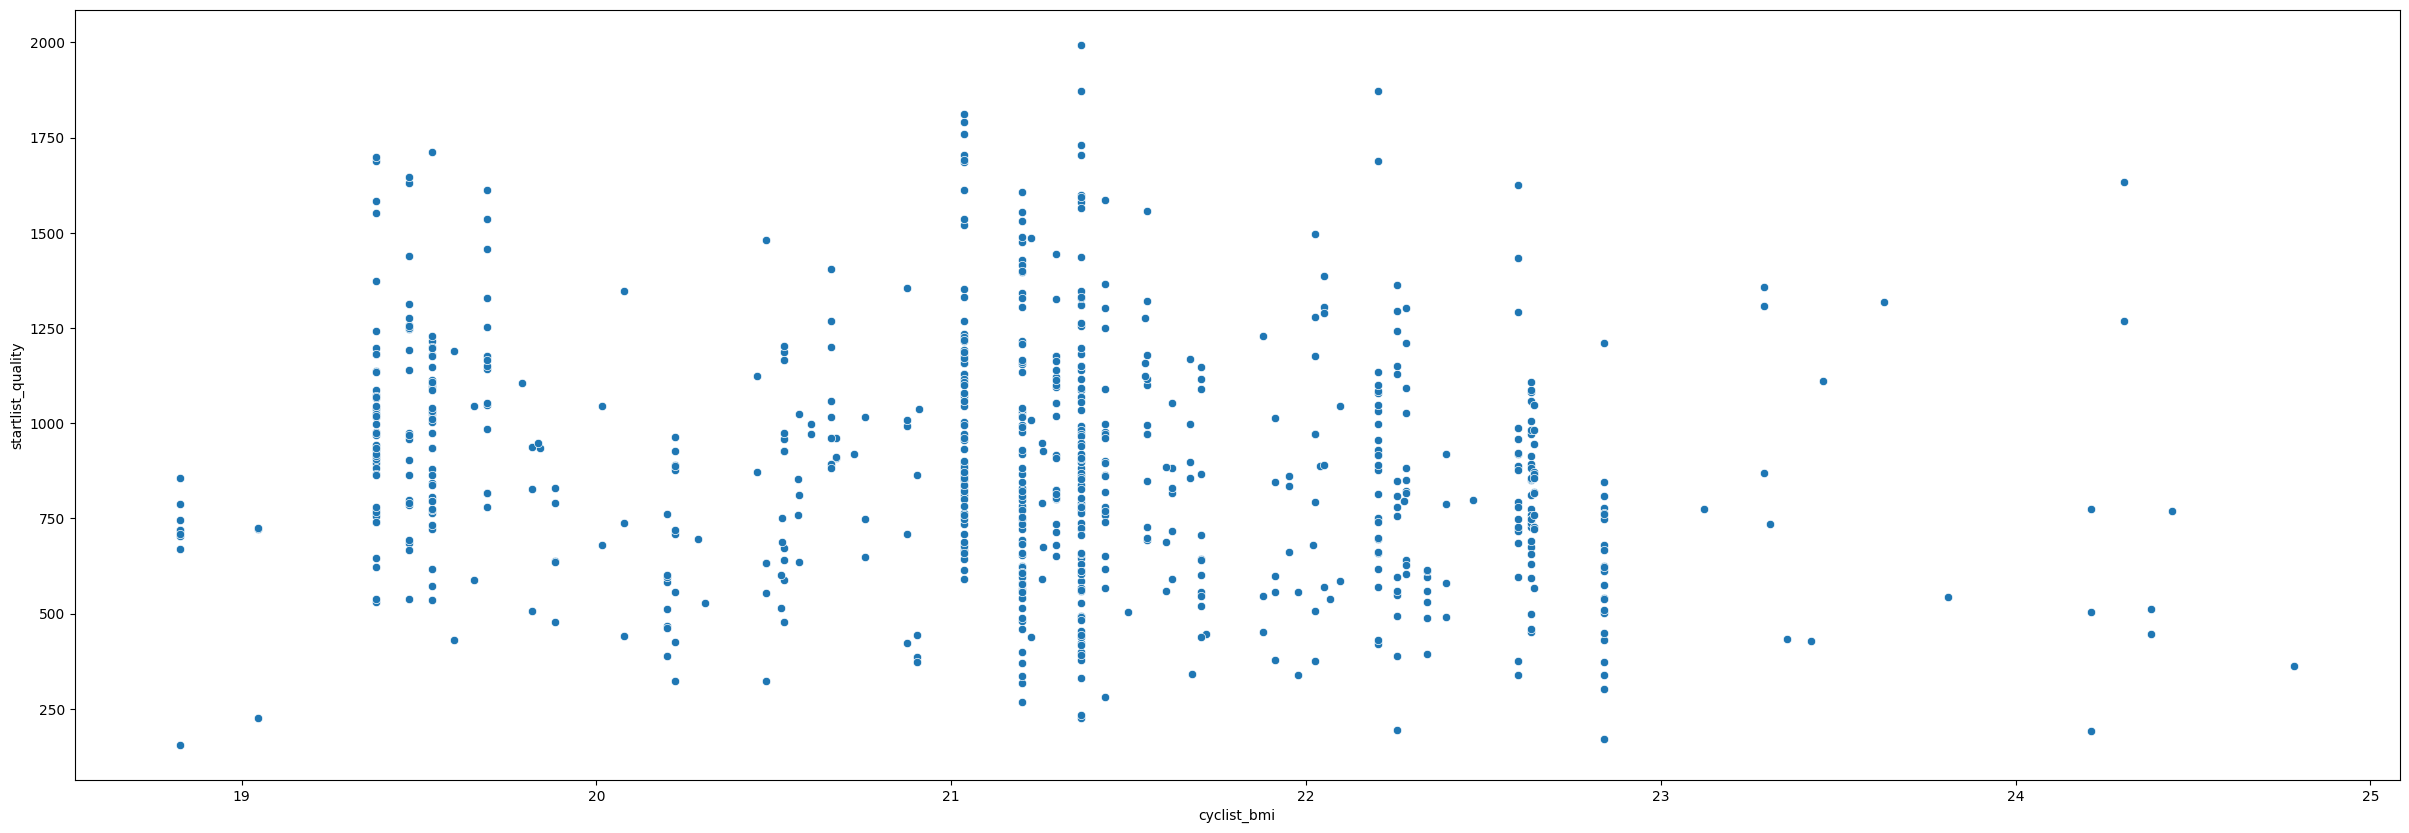

In [33]:
tmp_df = pd.DataFrame({
    'startlist_quality': dataset['startlist_quality'],
    'race_name': dataset['race_name'],
    'year': dataset['date'].dt.year,
    'cyclist_bmi': dataset['cyclist_bmi'],
}).drop_duplicates(subset=['race_name', 'year'])

plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='startlist_quality', data=tmp_df)
plt.show()

In [34]:
dataset.info()
# birth year, heigth -> float to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   race_url                      589865 non-null  object        
 1   race_name                     589865 non-null  object        
 2   points                        589388 non-null  float64       
 3   uci_points                    251086 non-null  float64       
 4   length                        589865 non-null  float64       
 5   climb_total                   442820 non-null  float64       
 6   profile                       441671 non-null  float64       
 7   startlist_quality             589865 non-null  int64         
 8   date                          589865 non-null  datetime64[ns]
 9   position                      589859 non-null  float64       
 10  cyclist_url                   589865 non-null  object        
 11  cyclist_age  

### Age-Group Attribute

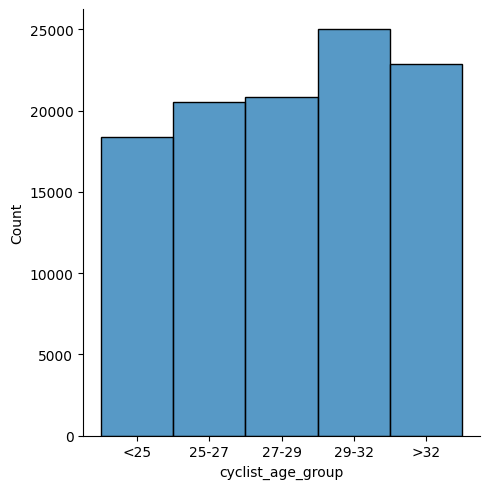

In [35]:
n_bins = dataset['cyclist_age_group'].nunique()

sb.displot(dataset[['cyclist_url', 'race_name', 'race_year', 'cyclist_age_group']].drop_duplicates(subset=['cyclist_url', 'race_name', 'race_year']), 
                x="cyclist_age_group", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

In [36]:
dataset.groupby('cyclist_age_group')['position'].describe()

count      mean       std  min       25%       50%  \
cyclist_age_group                                                          
25-27              112266.0  0.504426  0.296342  0.0  0.243421  0.507692   
27-29              115108.0  0.490472  0.294060  0.0  0.232377  0.484771   
29-32              140300.0  0.485845  0.289604  0.0  0.235294  0.479290   
<25                 91457.0  0.530405  0.294964  0.0  0.275862  0.545977   
>32                130614.0  0.498435  0.282108  0.0  0.260355  0.497175   

                        75%  max  
cyclist_age_group                 
25-27              0.765432  1.0  
27-29              0.746269  1.0  
29-32              0.734199  1.0  
<25                0.790541  1.0  
>32                0.736842  1.0

In generale vecchio è meglio, la fascia migliore è 29-32

In [ ]:
tmp_df = dataset.drop_duplicates(subset=['race_name', 'race_year', 'cyclist_url'])
pd.crosstab(tmp_df['cyclist_age_group'], tmp_df['race_season'], normalize='index')

race_season          autumn    spring    summer    winter
cyclist_age_group                                        
25-27              0.044027  0.464895  0.207509  0.283569
27-29              0.039931  0.460429  0.213461  0.286180
29-32              0.041518  0.458782  0.211192  0.288508
<25                0.052560  0.467817  0.197617  0.282007
>32                0.039265  0.450427  0.196892  0.313417

possiamo dire che la classe d'età più giovane sia più frequente nei periodi autunnali e primaverili mentre le fasce d'età media (27-29, 29-32) sono le più frequenti in estate. La classe più anziana (> 32) risulta la più frequente di inverno

<Axes: xlabel='cyclist_age_group', ylabel='startlist_quality'>

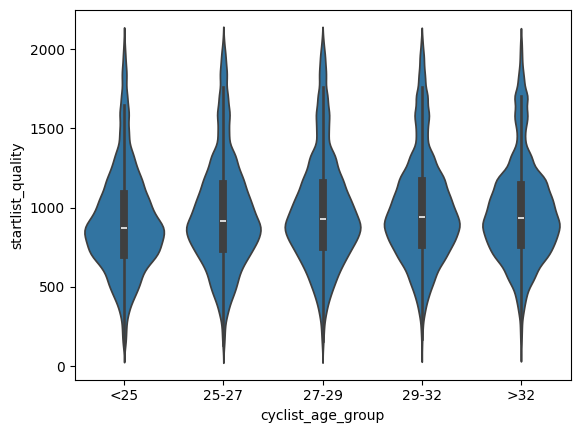

In [52]:
sb.violinplot(data=tmp_df, x='cyclist_age_group', y='startlist_quality')

In [50]:
tmp_df.groupby('cyclist_age_group')['startlist_quality'].describe()

count        mean         std    min    25%    50%  \
cyclist_age_group                                                         
25-27              20510.0  960.134861  340.423369  115.0  737.0  917.0   
27-29              20861.0  975.904703  338.654354  115.0  754.0  928.0   
29-32              25001.0  987.292988  329.690266  115.0  766.0  943.0   
<25                18379.0  909.569128  319.074987  115.0  704.0  869.0   
>32                22845.0  975.539243  314.213167  115.0  764.0  935.0   

                      75%     max  
cyclist_age_group                  
25-27              1148.0  2047.0  
27-29              1158.0  2047.0  
29-32              1165.0  2047.0  
<25                1084.0  2047.0  
>32                1140.0  2047.0

il trend della startlist_quality sembra essere correlato alla crescita dell'età fino alla fascia 29-32, dopo la quale sembra avere una discesa

<Axes: xlabel='cyclist_age_group', ylabel='points'>

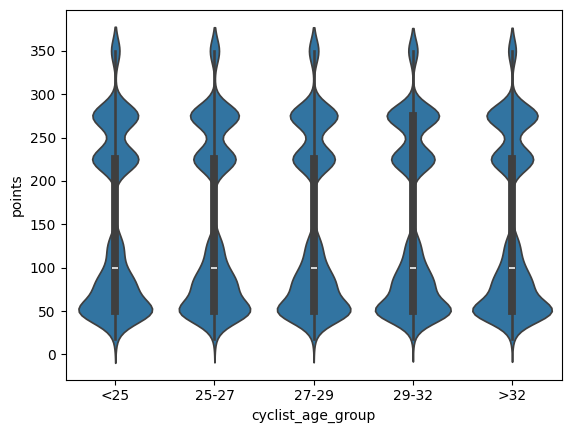

In [53]:
sb.violinplot(data=tmp_df, x='cyclist_age_group', y='points')

In [54]:
tmp_df.groupby('cyclist_age_group')['points'].describe()

count        mean        std   min   25%    50%    75%  \
cyclist_age_group                                                             
25-27              20505.0  151.711339  98.741703  18.0  50.0  100.0  225.0   
27-29              20857.0  150.578511  98.790382  18.0  50.0  100.0  225.0   
29-32              24996.0  152.097016  99.137933  18.0  50.0  100.0  275.0   
<25                18374.0  151.469141  98.661431  18.0  50.0  100.0  225.0   
>32                22842.0  148.815121  98.624942  18.0  50.0  100.0  225.0   

                     max  
cyclist_age_group         
25-27              350.0  
27-29              350.0  
29-32              350.0  
<25                350.0  
>32                350.0

non sembra esserci una correlazione forte tra i punti associati alle gare e l'età dei ciclisti, il che riprova ulteriormente che i punti non siano collegati con la startlist_quality

In [64]:
pd.crosstab(tmp_df['cyclist_team'], tmp_df['cyclist_age_group'], normalize='index')

cyclist_age_group                        25-27     27-29     29-32       <25  \
cyclist_team                                                                   
ag2r-prevoyance-2001                  0.204032  0.150806  0.230645  0.167742   
atala-1985                            0.238474  0.154213  0.255962  0.176471   
atala-campagnolo-1983                 0.161708  0.228978  0.192755  0.188875   
atala-ofmega-1988                     0.117073  0.239024  0.248780  0.180488   
australia-1983                        0.204604  0.164962  0.208440  0.164962   
...                                        ...       ...       ...       ...   
united-states-1998                    0.175713  0.163753  0.244710  0.180313   
ville-de-charleroi-new-systems-2000   0.165485  0.201734  0.275020  0.137116   
vini-fantini-2013                     0.253996  0.220249  0.225577  0.166963   
vini-ricordi-pinarello-sidermec-1986  0.184956  0.193805  0.238938  0.146903   
watney-avia-1972                      0.185430  0.172185  0.204352  0.202460   

cyclist_age_group                          >32  
cyclist_team                                    
ag2r-prevoyance-2001                  0.246774  
atala-1985                            0.174881  
atala-campagnolo-1983                 0.227684  
atala-ofmega-1988                     0.214634  
australia-1983                        0.257033  
...                                        ...  
united-states-1998                    0.235511  
ville-de-charleroi-new-systems-2000   0.220646  
vini-fantini-2013                     0.133215  
vini-ricordi-pinarello-sidermec-1986  0.235398  
watney-avia-1972                      0.235572  

[91 rows x 5 columns]

### Climb-Power Attribute

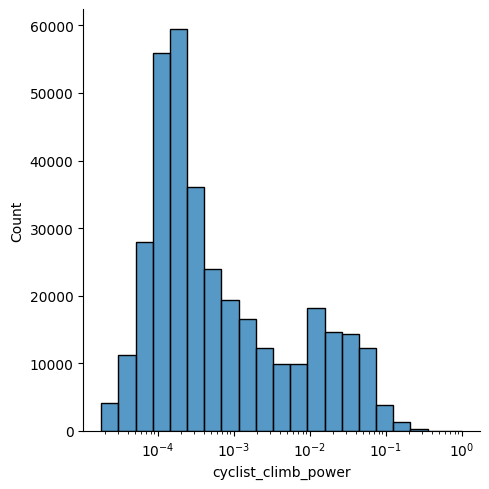

In [37]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_climb_power', 'cyclist_url', 'date']), 
                x="cyclist_climb_power", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)

<Axes: xlabel='cyclist_climb_power', ylabel='cyclist_age_group'>

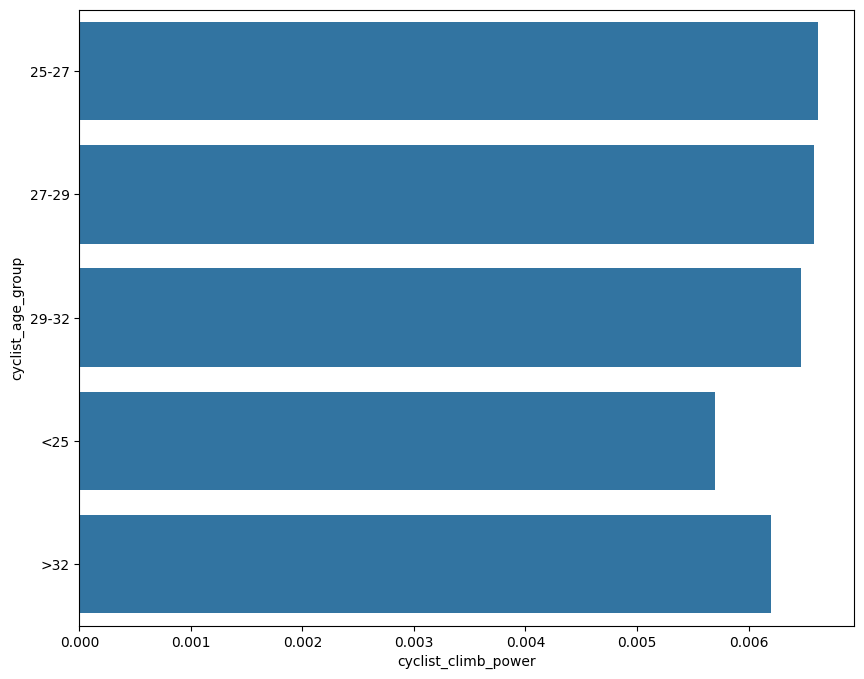

In [ ]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset[dataset['profile'] > 2]['cyclist_age_group'],
    'cyclist_climb_power': dataset[dataset['profile'] > 2]['cyclist_climb_power'],
})

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_climb_power'].mean().reset_index() #TODO: ordina per età

plt.figure(figsize=(10, 8))
sb.barplot(y='cyclist_age_group', x='cyclist_climb_power', data=tmp_mean[tmp_mean['cyclist_climb_power'].notnull()], orient='h')

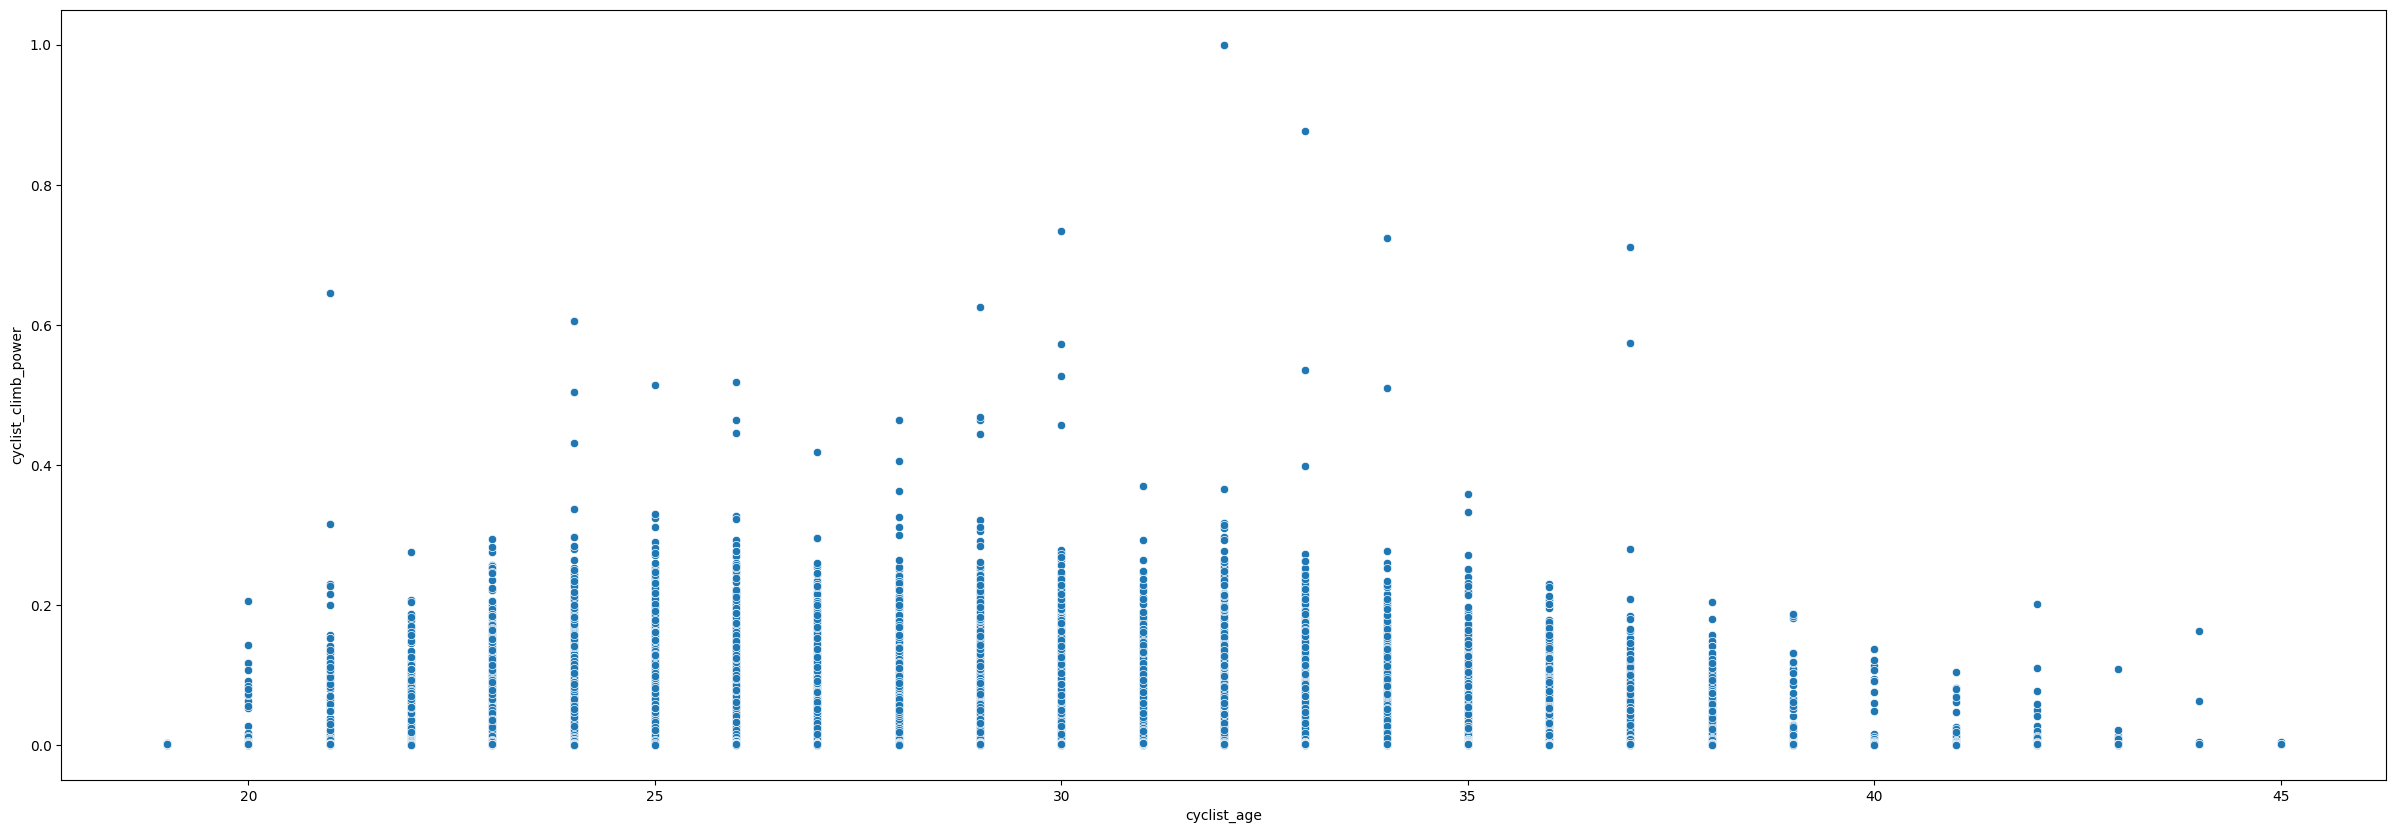

In [39]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_age', y='cyclist_climb_power', data=dataset[dataset['profile'] > 2]) #TODO: execute it with "nationality_groups" as color
plt.show()

Aumenta raggiunge apice poi diminuisce

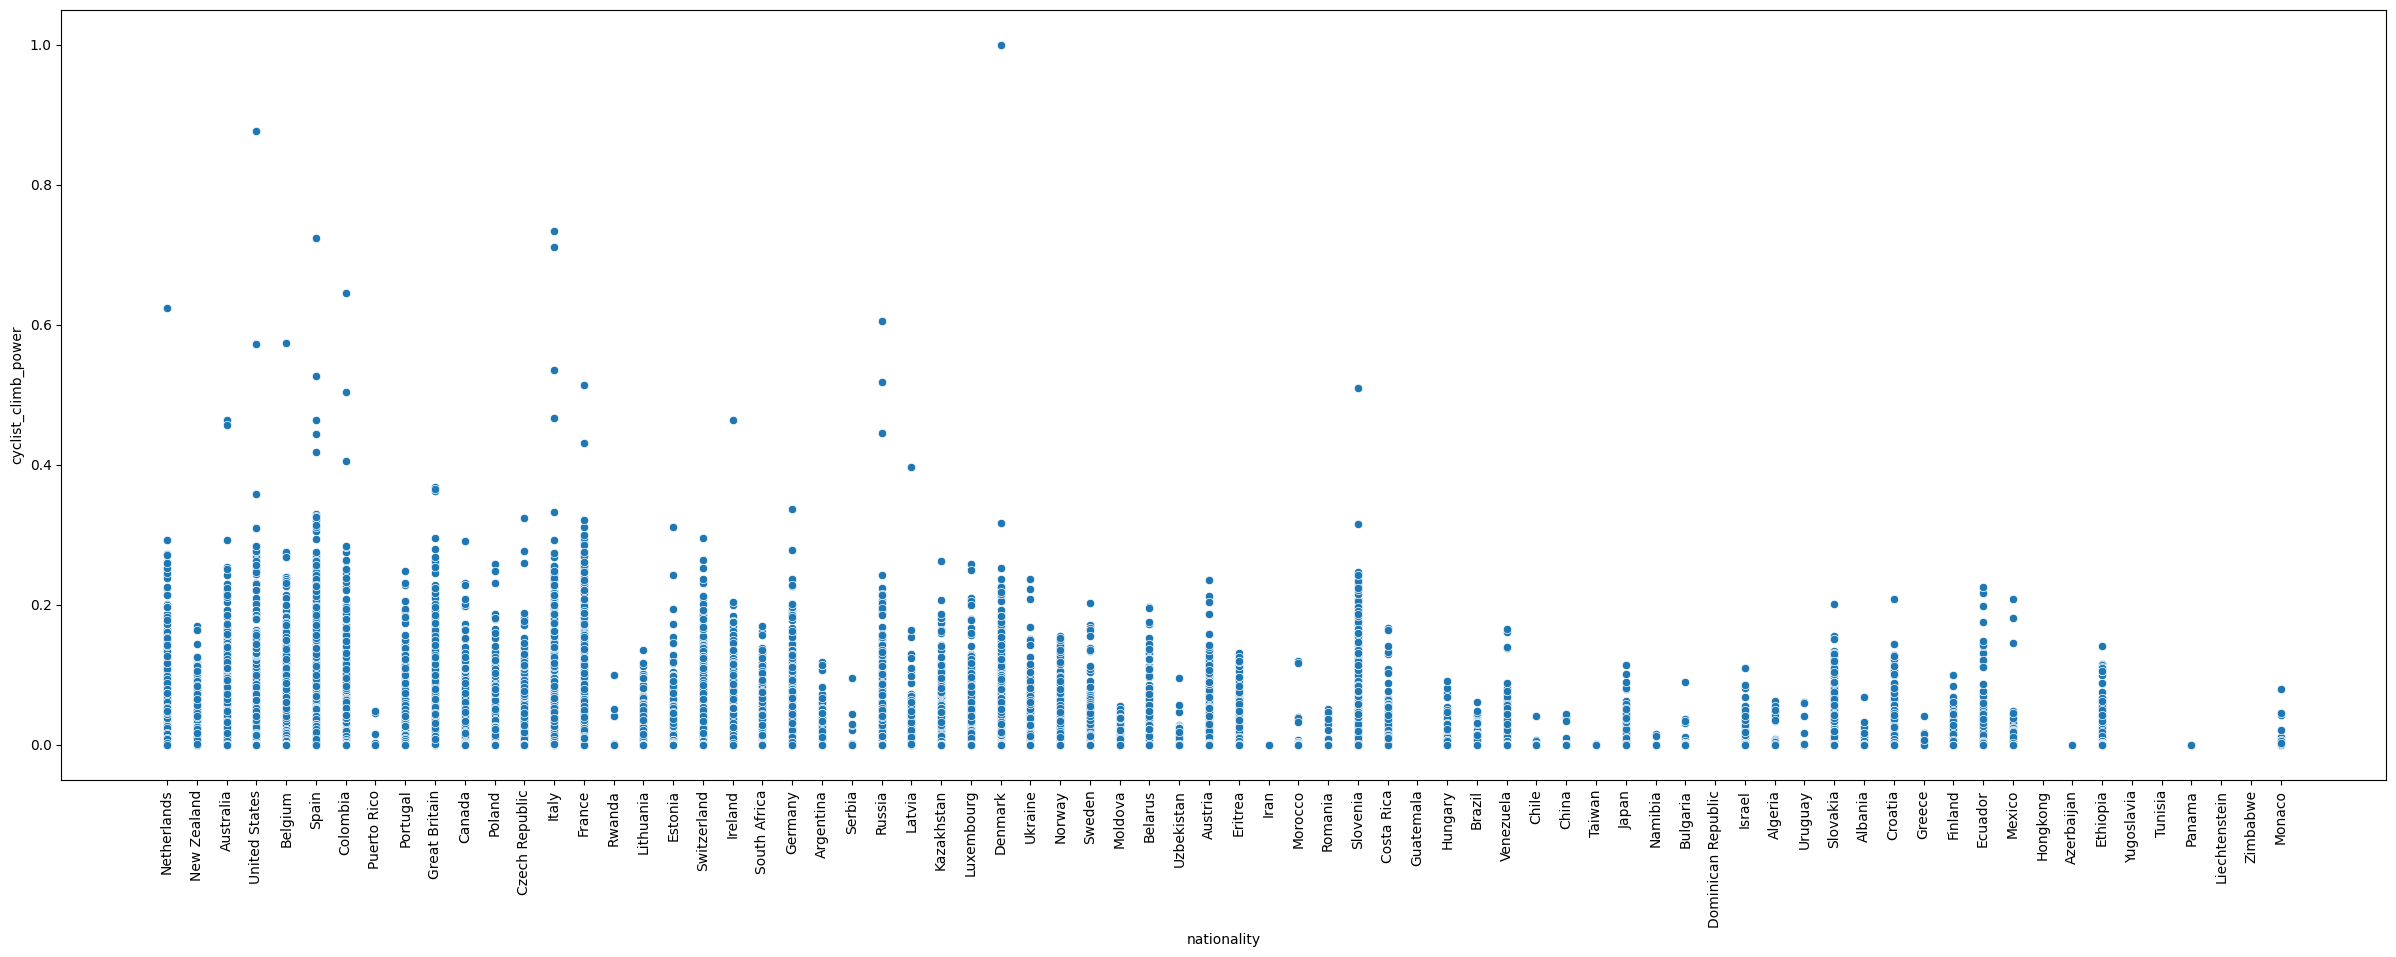

In [40]:
#TODO: provare a ordinare per climb_power medio, considerare gruppi di nazionalità, filtrare gare con poco climb_total e profile
plt.figure(figsize=(30, 10))
sb.scatterplot(x='nationality', y='cyclist_climb_power', data=dataset)
plt.xticks(rotation=90)
plt.show()

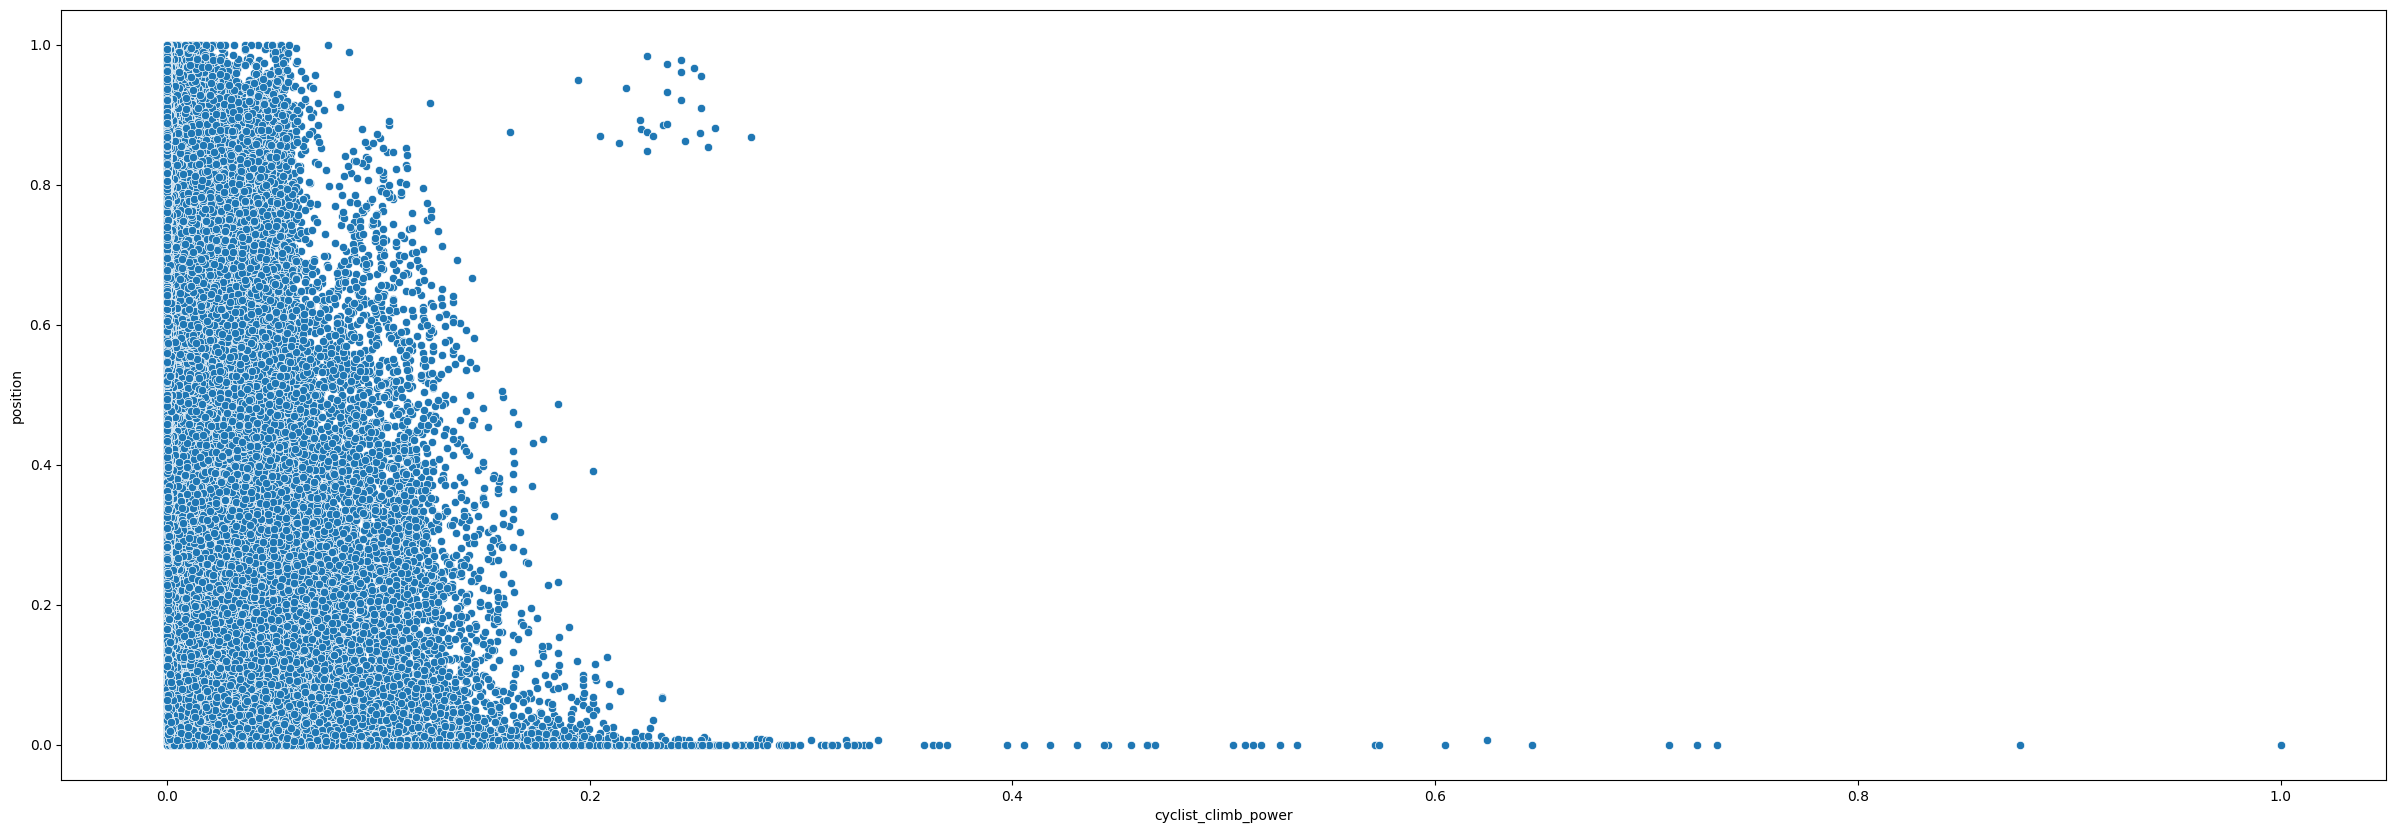

In [41]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_climb_power', y='position', data=dataset)
plt.show()

poco climb power sul flat

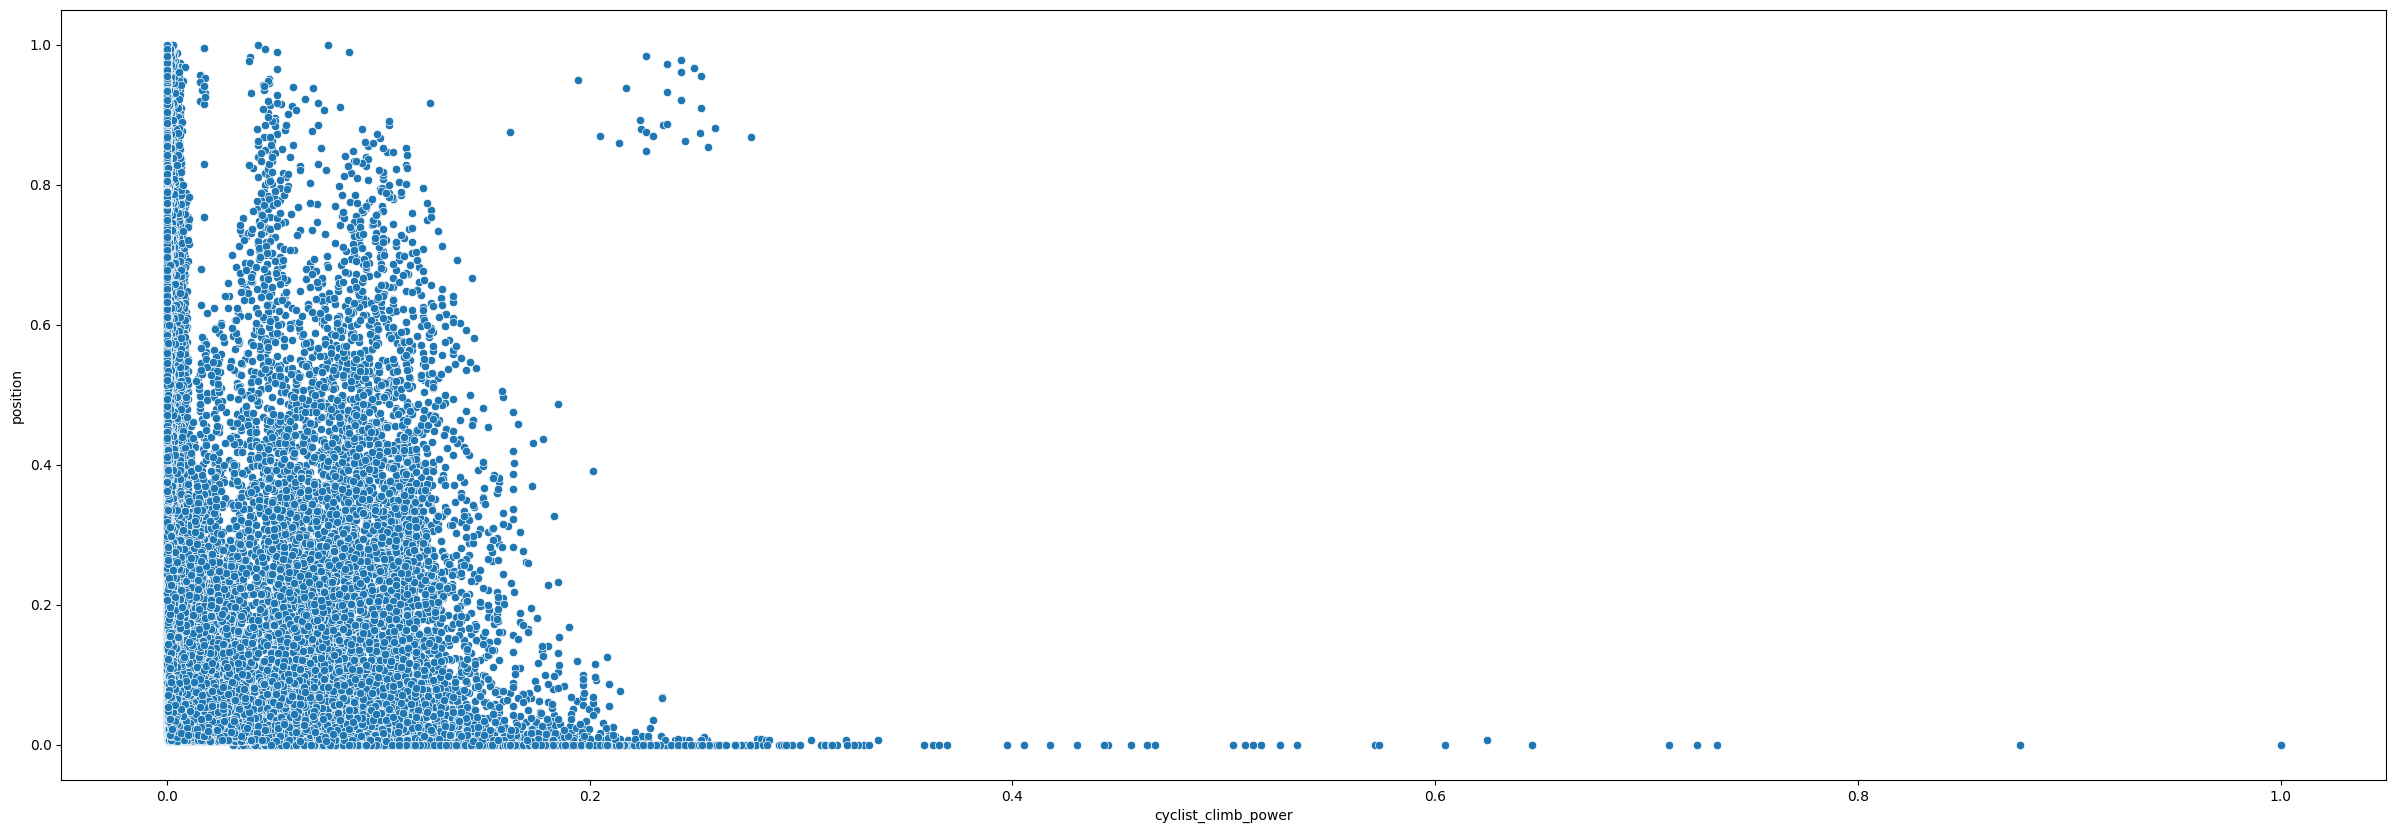

In [42]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_climb_power', y='position', data=dataset[dataset['profile'] > 2])
plt.show()

### Season Attribute

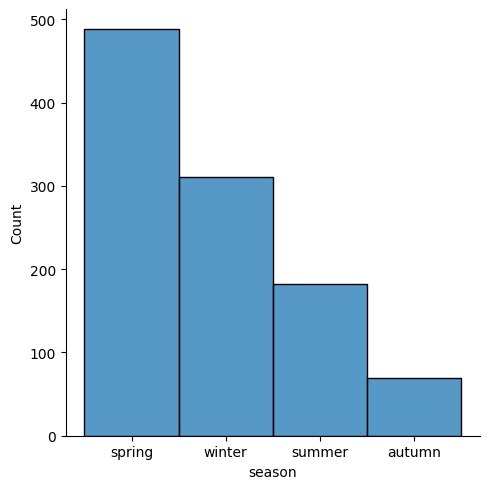

In [19]:
tmp_df = pd.DataFrame({
    'season': dataset['race_season'],
    'race_name': dataset['race_name'],
    'cyclist_climb_power': dataset['cyclist_climb_power'],
    'length': dataset['length'],
    'climb_percentage': dataset['climb_percentage'], 
    'profile': dataset['profile'],
    'year': dataset['date'].dt.year,
})

n_bins = 4

sb.displot(tmp_df.drop_duplicates(subset=['race_name', 'year']), 
                x="season", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)

<Axes: xlabel='cyclist_climb_power', ylabel='season'>

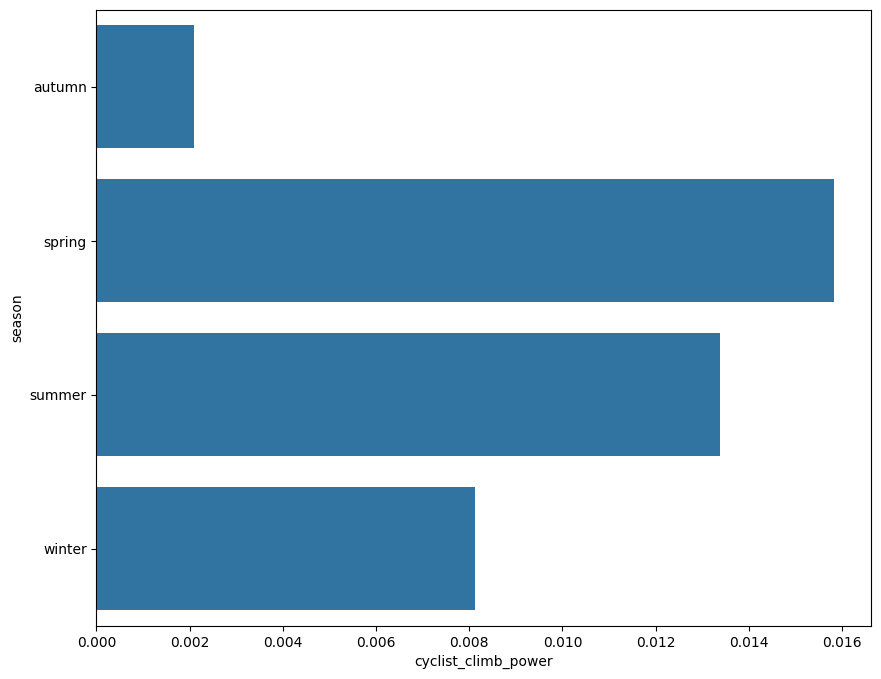

In [20]:
tmp_mean = tmp_df[tmp_df['profile'] > 2].drop_duplicates(subset=['race_name', 'year']).groupby('season')['cyclist_climb_power'].mean().reset_index()
# avoid profile in {1,2} because they represent flat races
plt.figure(figsize=(10, 8))
sb.barplot(y='season', x='cyclist_climb_power', data=tmp_mean[tmp_mean['cyclist_climb_power'].notnull()], orient='h')

<Axes: xlabel='climb_percentage', ylabel='season'>

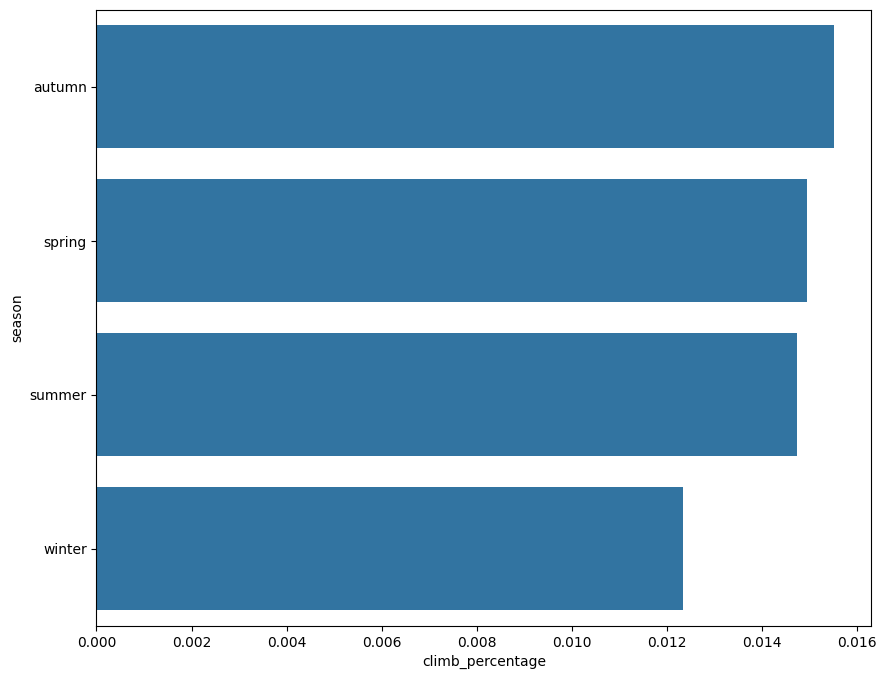

In [21]:
tmp_mean = tmp_df.groupby('season')['climb_percentage'].mean().reset_index()
# filtrare gare con poco climb_total e profile
plt.figure(figsize=(10, 8))
sb.barplot(y='season', x='climb_percentage', data=tmp_mean[tmp_mean['climb_percentage'].notnull()], orient='h')

Text(0.5, 1.0, 'Spring')

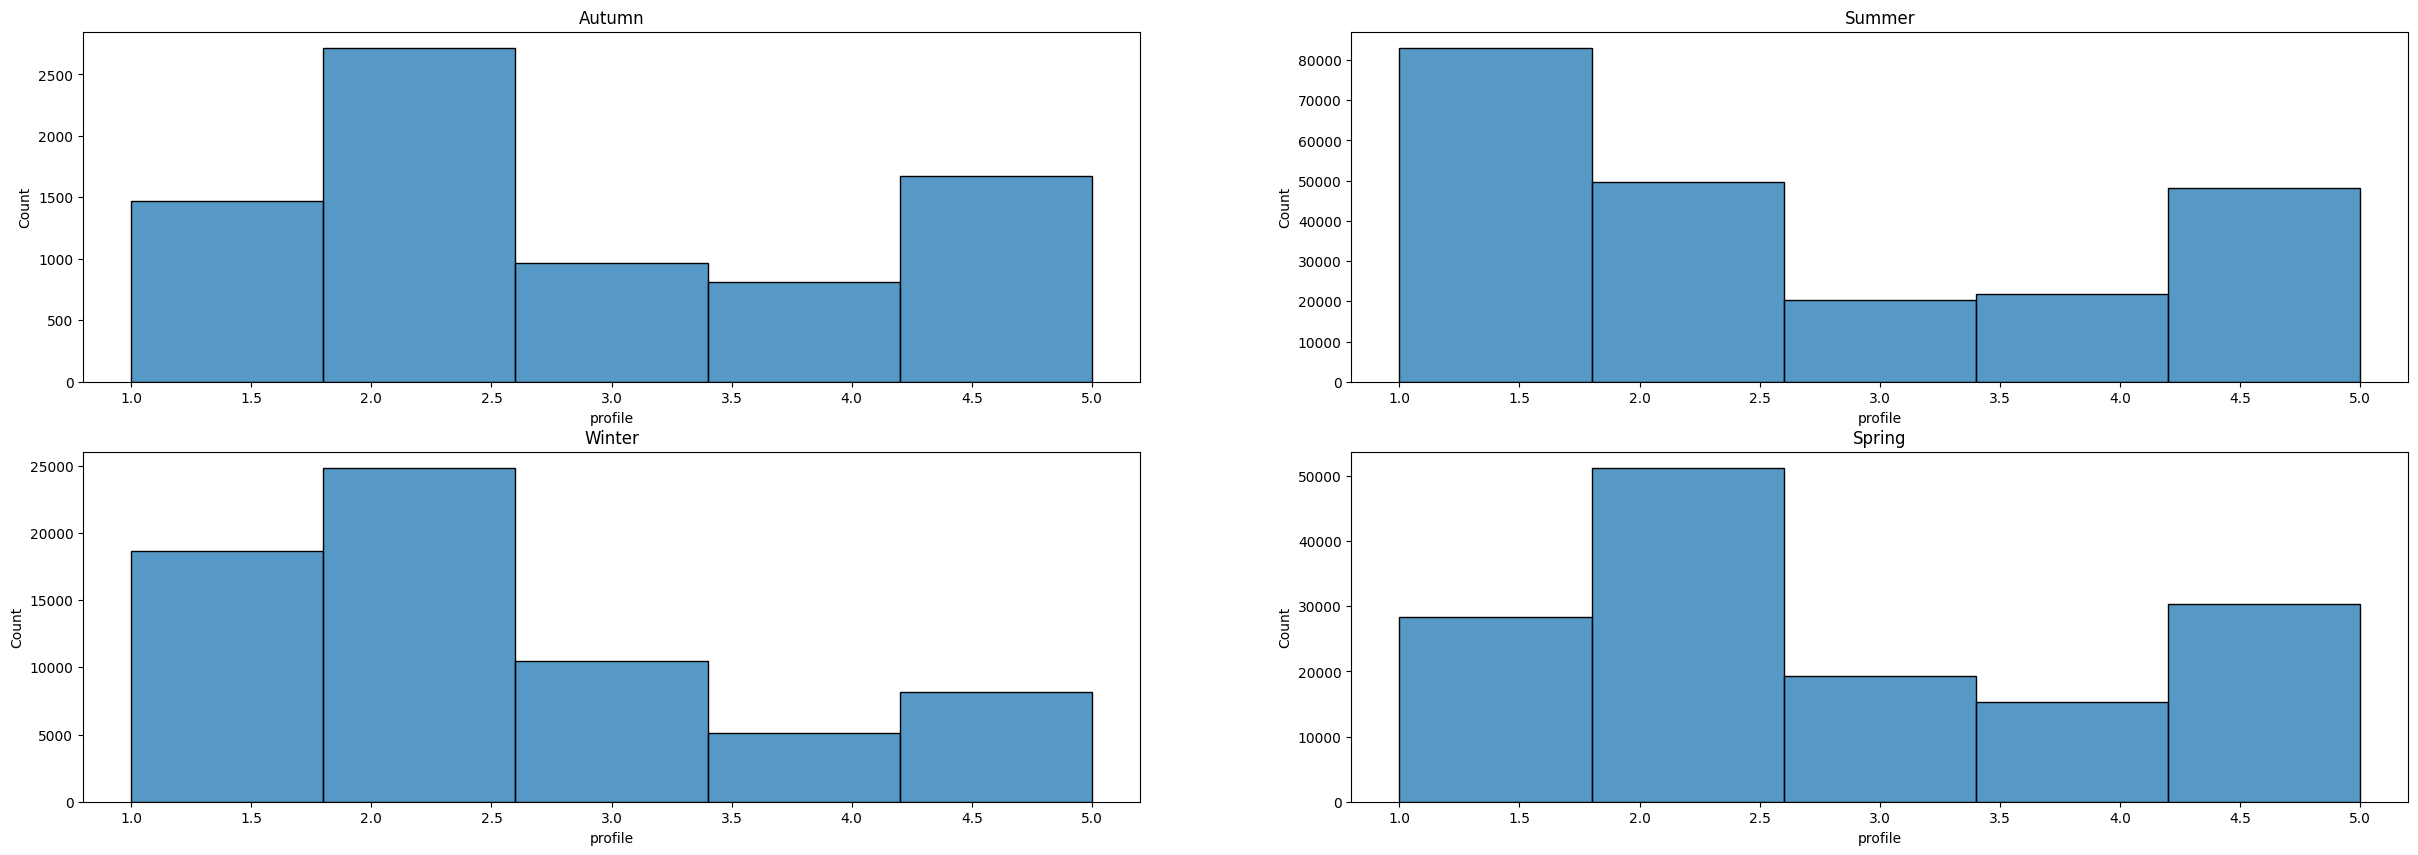

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['season'] == 'autumn'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0, 0].set_title('Autumn') 

sb.histplot(tmp_df[tmp_df['season'] == 'summer'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0, 1].set_title('Summer')

sb.histplot(tmp_df[tmp_df['season'] == 'winter'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1, 0].set_title('Winter')

sb.histplot(tmp_df[tmp_df['season'] == 'spring'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1, 1].set_title('Spring') 

### Previous Experience Attribute (SUS)

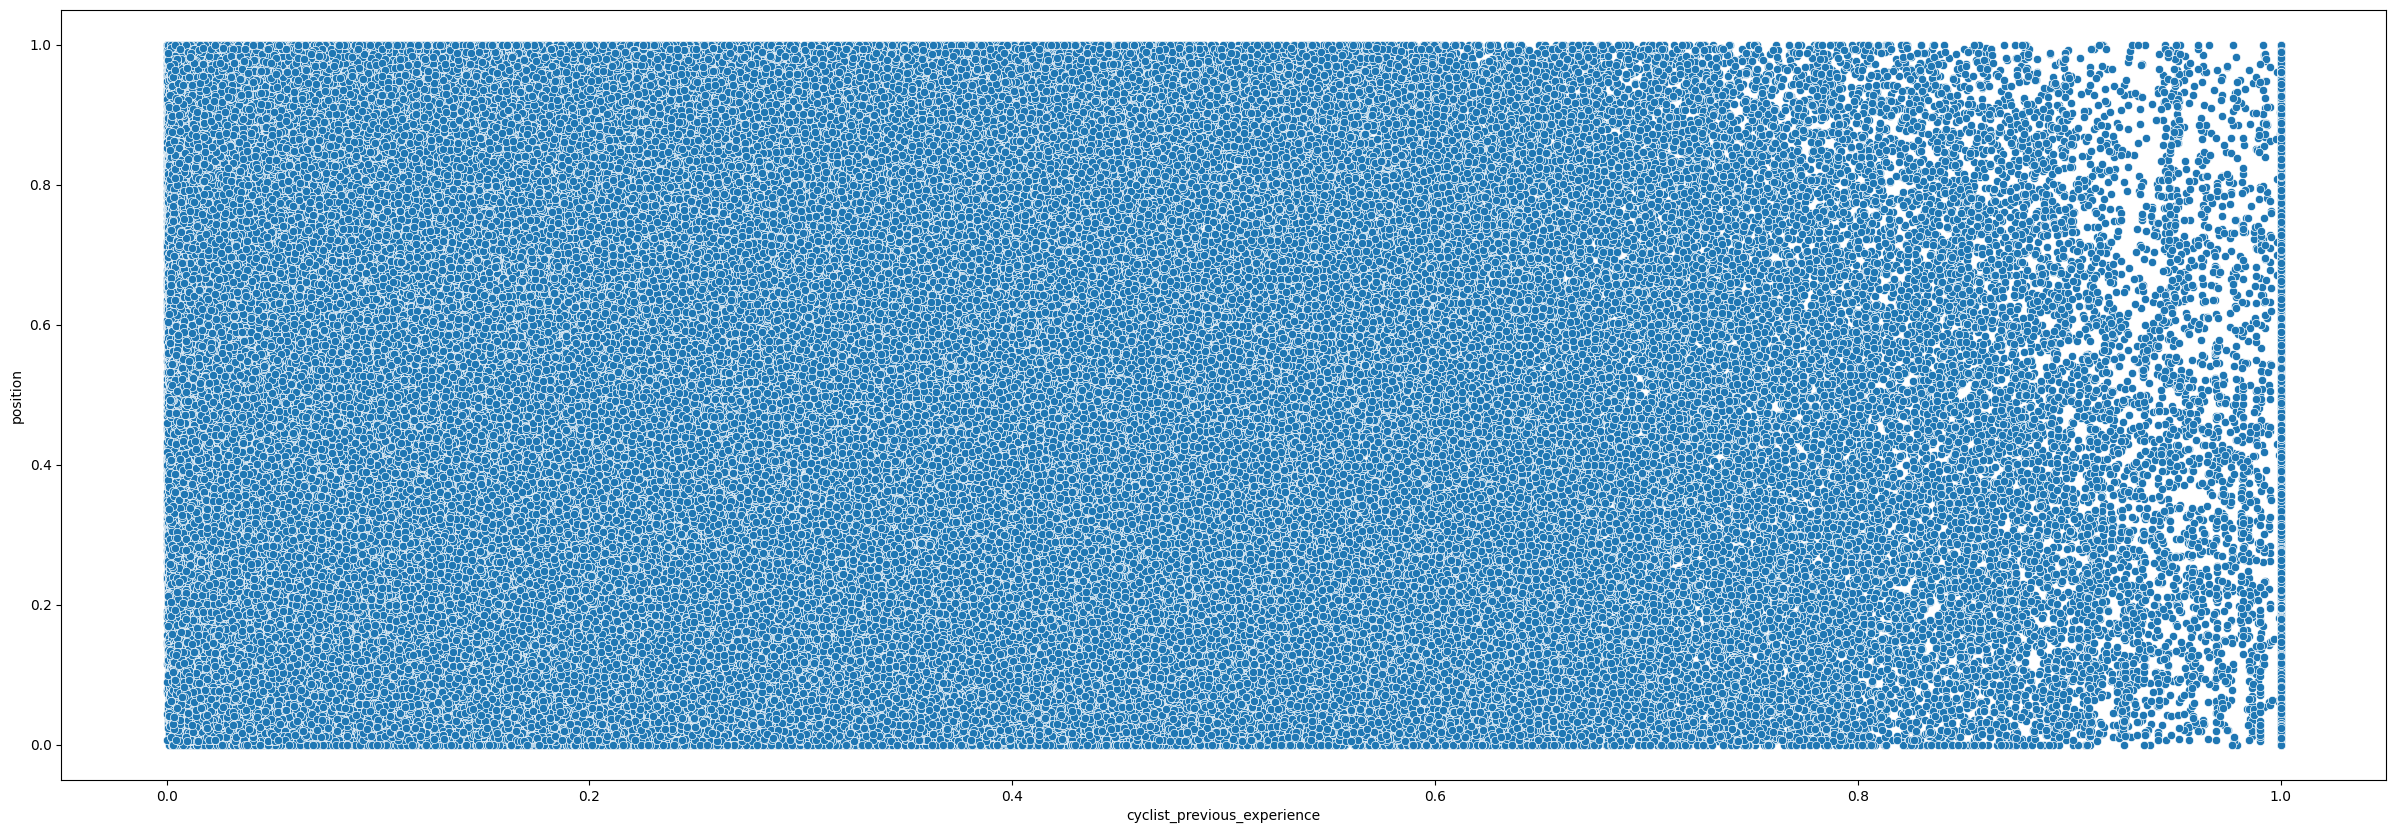

In [23]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_previous_experience', y='position', data=dataset)
plt.show()

In [24]:
dataset.groupby('race_url')['cyclist_previous_experience'].describe()

count      mean       std       min       25%  \
race_url                                                                        
amstel-gold-race/1970/result      0.0       NaN       NaN       NaN       NaN   
amstel-gold-race/1971/result      0.0       NaN       NaN       NaN       NaN   
amstel-gold-race/1972/result      0.0       NaN       NaN       NaN       NaN   
amstel-gold-race/1973/result      0.0       NaN       NaN       NaN       NaN   
amstel-gold-race/1974/result      0.0       NaN       NaN       NaN       NaN   
...                               ...       ...       ...       ...       ...   
world-championship/2018/result   74.0  0.399518  0.245391  0.004954  0.195286   
world-championship/2019/result   45.0  0.371144  0.240320  0.008142  0.199922   
world-championship/2020/result   76.0  0.327278  0.256081  0.006242  0.094687   
world-championship/2021/result   68.0  0.275138  0.216063  0.008619  0.067963   
world-championship/2022/result   97.0  0.257921  0.241114  0.002916  0.060397   

                                     50%       75%  max  
race_url                                                 
amstel-gold-race/1970/result         NaN       NaN  NaN  
amstel-gold-race/1971/result         NaN       NaN  NaN  
amstel-gold-race/1972/result         NaN       NaN  NaN  
amstel-gold-race/1973/result         NaN       NaN  NaN  
amstel-gold-race/1974/result         NaN       NaN  NaN  
...                                  ...       ...  ...  
world-championship/2018/result  0.380852  0.582545  1.0  
world-championship/2019/result  0.336791  0.576696  1.0  
world-championship/2020/result  0.266838  0.514493  1.0  
world-championship/2021/result  0.263434  0.390407  1.0  
world-championship/2022/result  0.162353  0.410212  1.0  

[5281 rows x 8 columns]

In [25]:
dataset[dataset['race_url'] == 'world-championship/2018/result'][['position', 'cyclist_previous_experience']]

position  cyclist_previous_experience
2463    0.480000                     0.376204
12281   0.000000                     1.000000
13006   0.466667                     0.375426
14872   0.520000                     0.564314
40352   0.280000                     0.590210
...          ...                          ...
559484  0.760000                     0.658513
568061  0.560000                     0.243784
572205  0.640000                     0.894566
577588  0.493333                     0.407535
583328  0.546667                     0.032328

[76 rows x 2 columns]

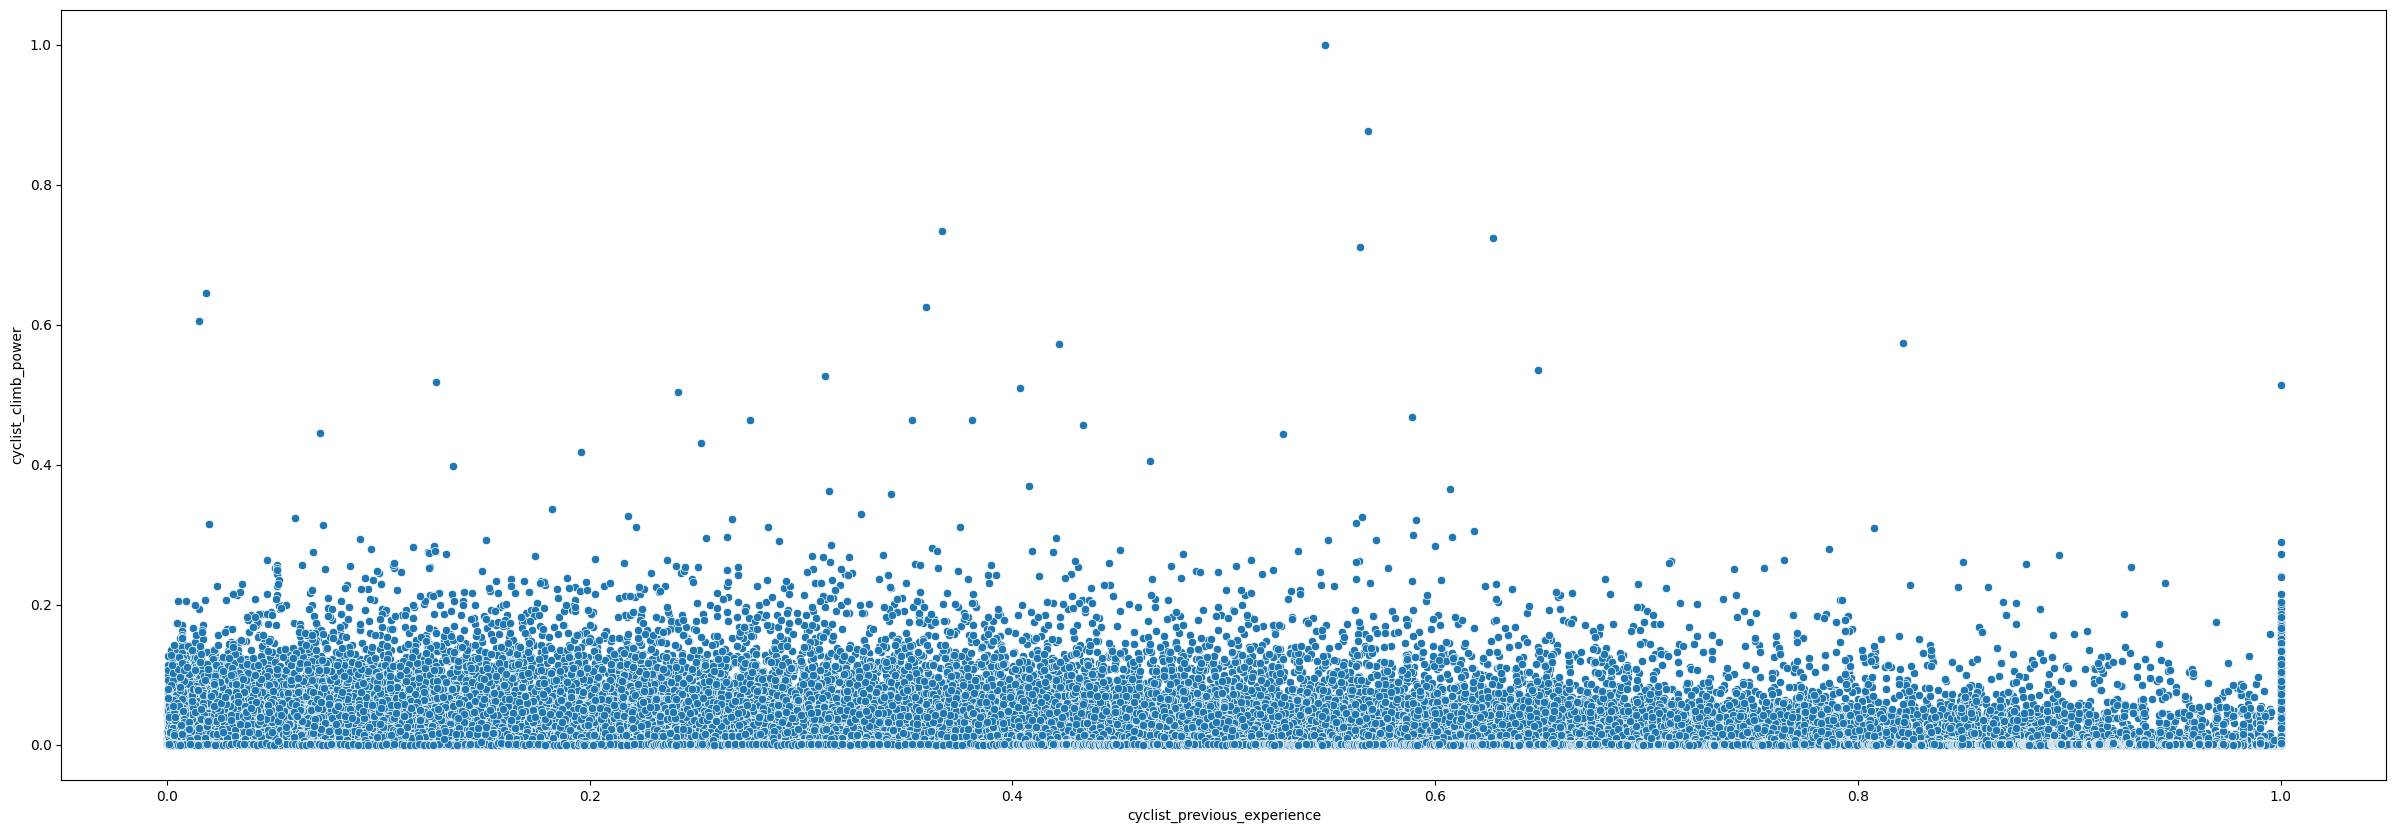

In [26]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_previous_experience', y='cyclist_climb_power', data=dataset)
plt.show()

### Physical Effort Attribute (SUS)

In [ ]:
mean_efforts = dataset.groupby(by=['race_name', 'year'])['race_physical_effort'].mean().reset_index()

race_name  year  race_physical_effort
0                    Amstel Gold Race  1970                   NaN
1                    Amstel Gold Race  1971                   NaN
2                    Amstel Gold Race  1972                   NaN
3                    Amstel Gold Race  1973                   NaN
4                    Amstel Gold Race  1974                   NaN
...                               ...   ...                   ...
1045  World Championships - Road Race  2018              0.608096
1046  World Championships - Road Race  2019              0.236480
1047  World Championships - Road Race  2020              0.339099
1048  World Championships - Road Race  2021              0.170059
1049  World Championships - Road Race  2022              0.313307

[1050 rows x 3 columns]

In [39]:
race_prestige = dataset.groupby(by=['race_name', 'year'])['race_prestige'].mean().reset_index()

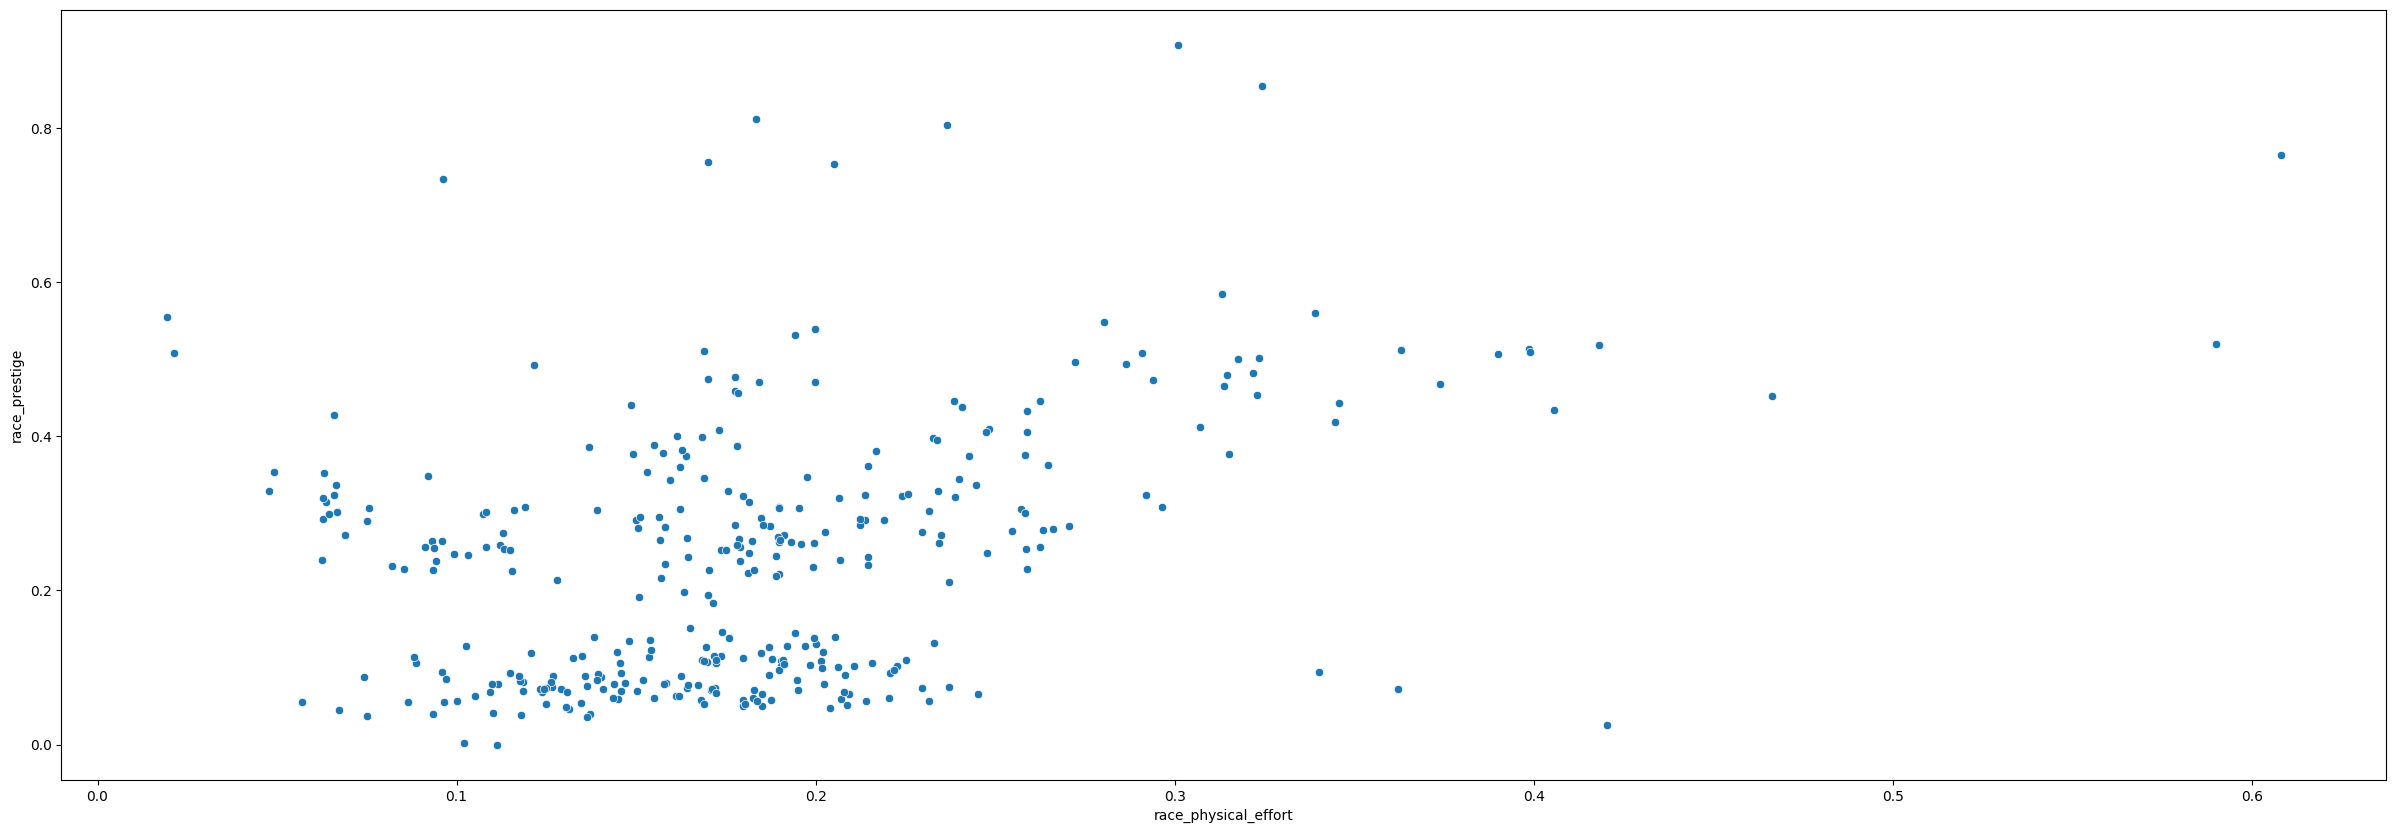

In [40]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x=mean_efforts['race_physical_effort'], y=race_prestige['race_prestige'])
plt.show()

Il prestigio tende a migliorare con l'aumentare del physical effort della gara

In [41]:
race_points = dataset.groupby(by=['race_name', 'year'])['points'].mean().reset_index()

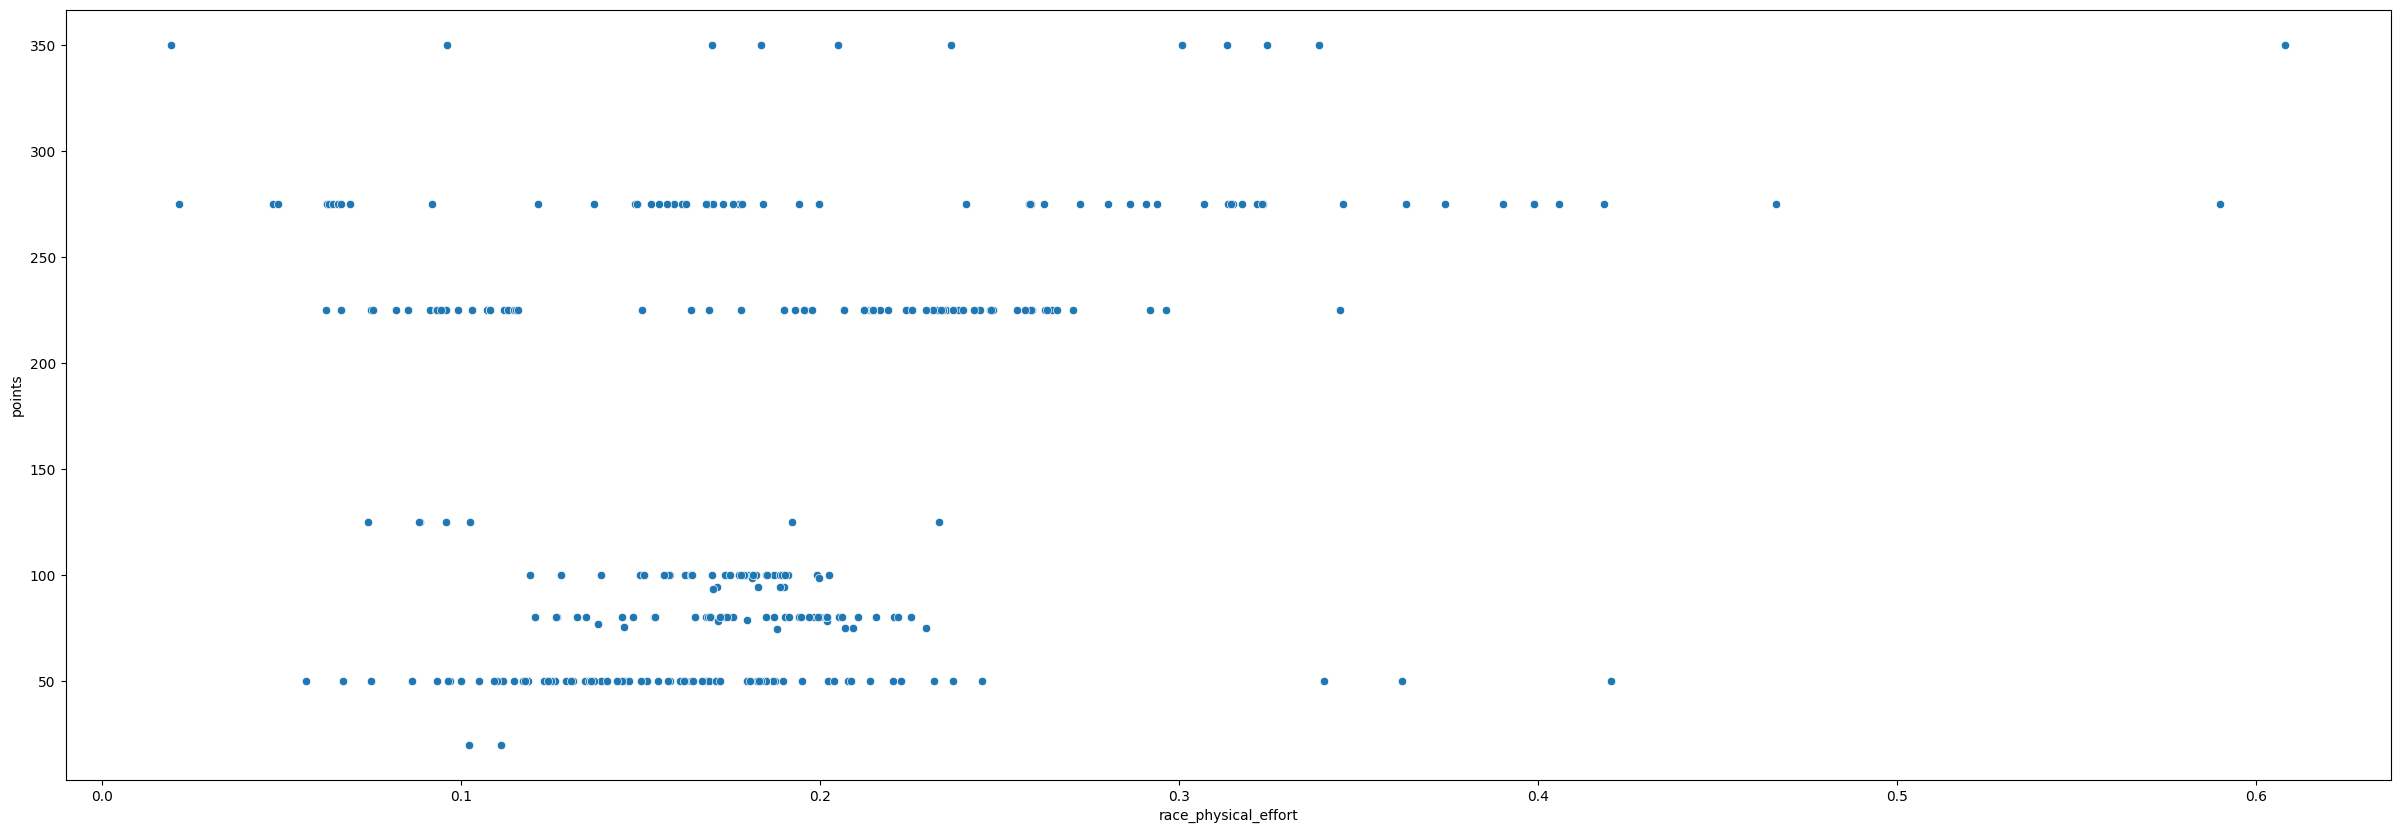

In [42]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x=mean_efforts['race_physical_effort'], y=race_points['points'])
plt.show()

i punti hanno una tendenza ad aumentare all'aumentare del physical effort ma il cluster di punti tra 50 e 150 in corrispondenza del physical effort 0.1 e 0.2 tende a concentrare li la maggior parte delle gare rispetto al loro prestigio

In [35]:
race_startlists = dataset.groupby(by=['race_name', 'year'])['startlist_quality'].unique().reset_index()
race_startlists['startlist_quality'] = race_startlists['startlist_quality'].apply(lambda x: x[0])

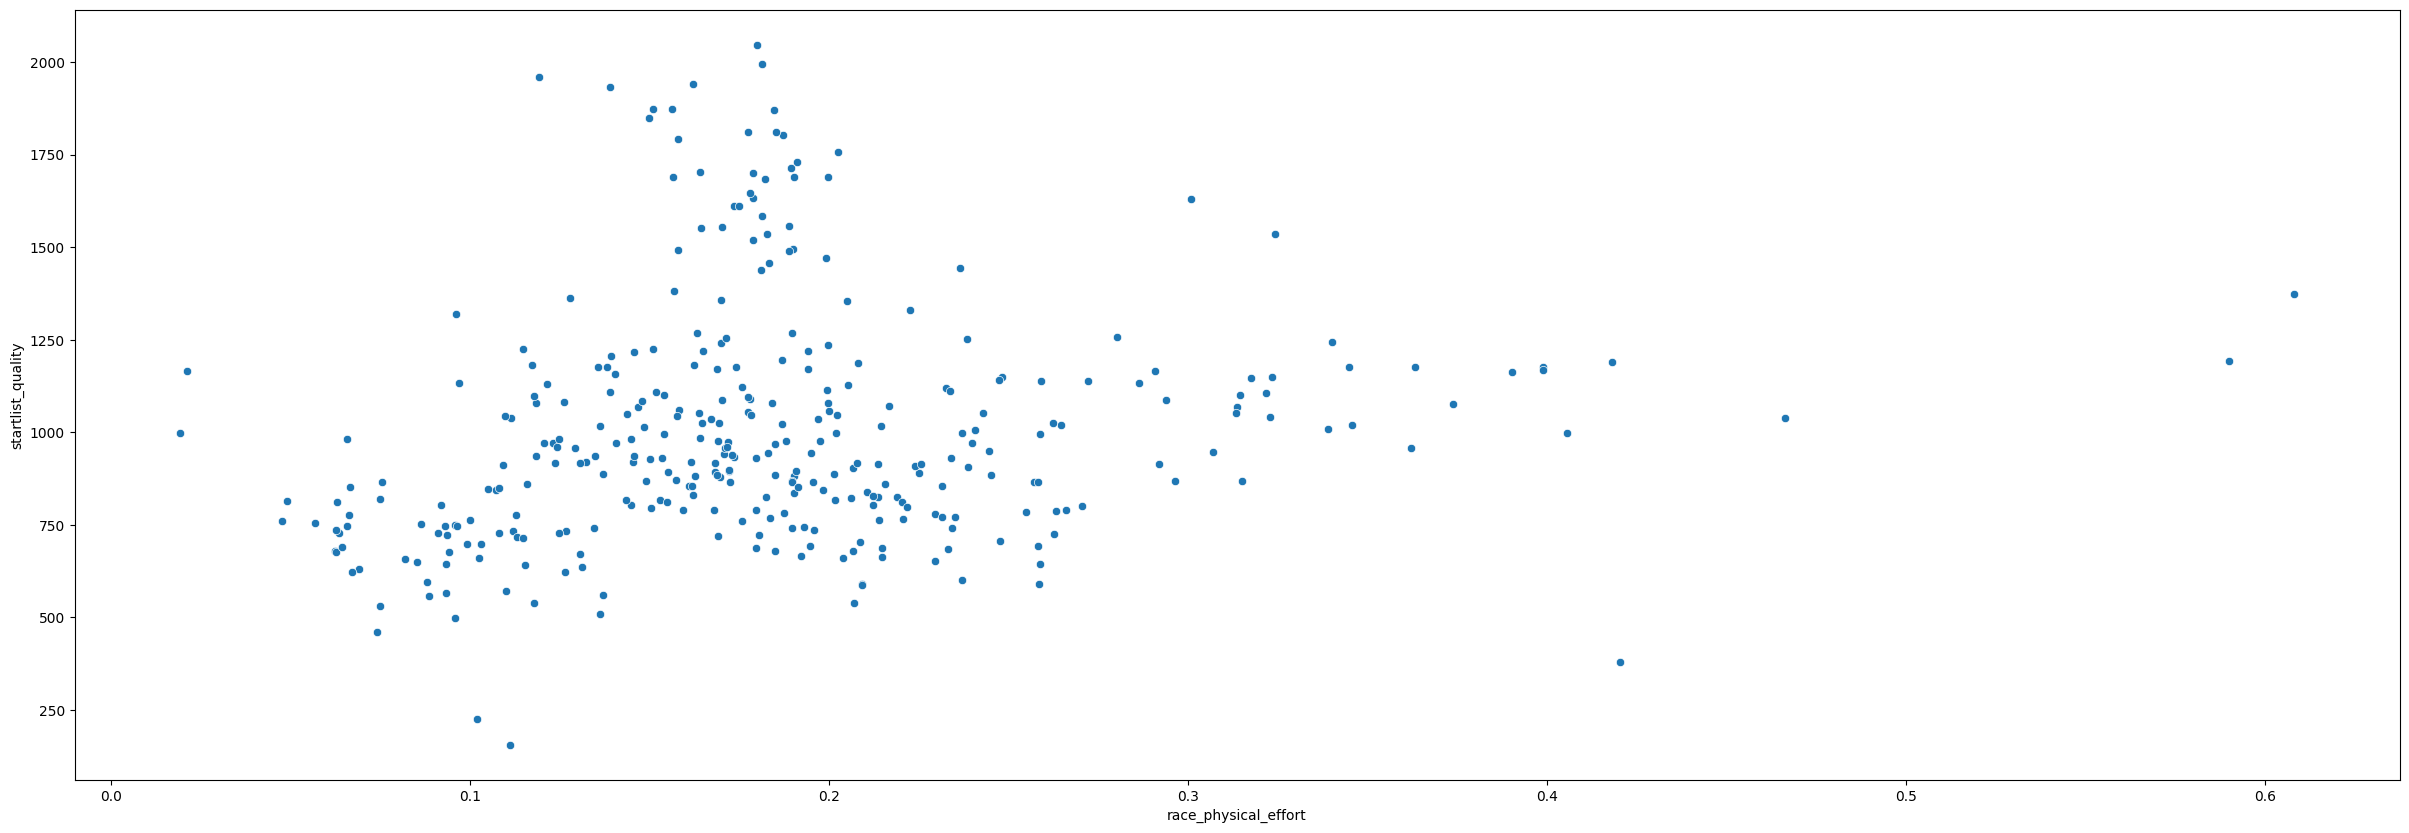

In [36]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x=mean_efforts['race_physical_effort'], y=race_startlists['startlist_quality'])
plt.show()

non sembra esserci una grande correlazione tra physical effort e startlist quality, in quanto le gare più prestigiose hanno effort tra 0.1 e 0.3

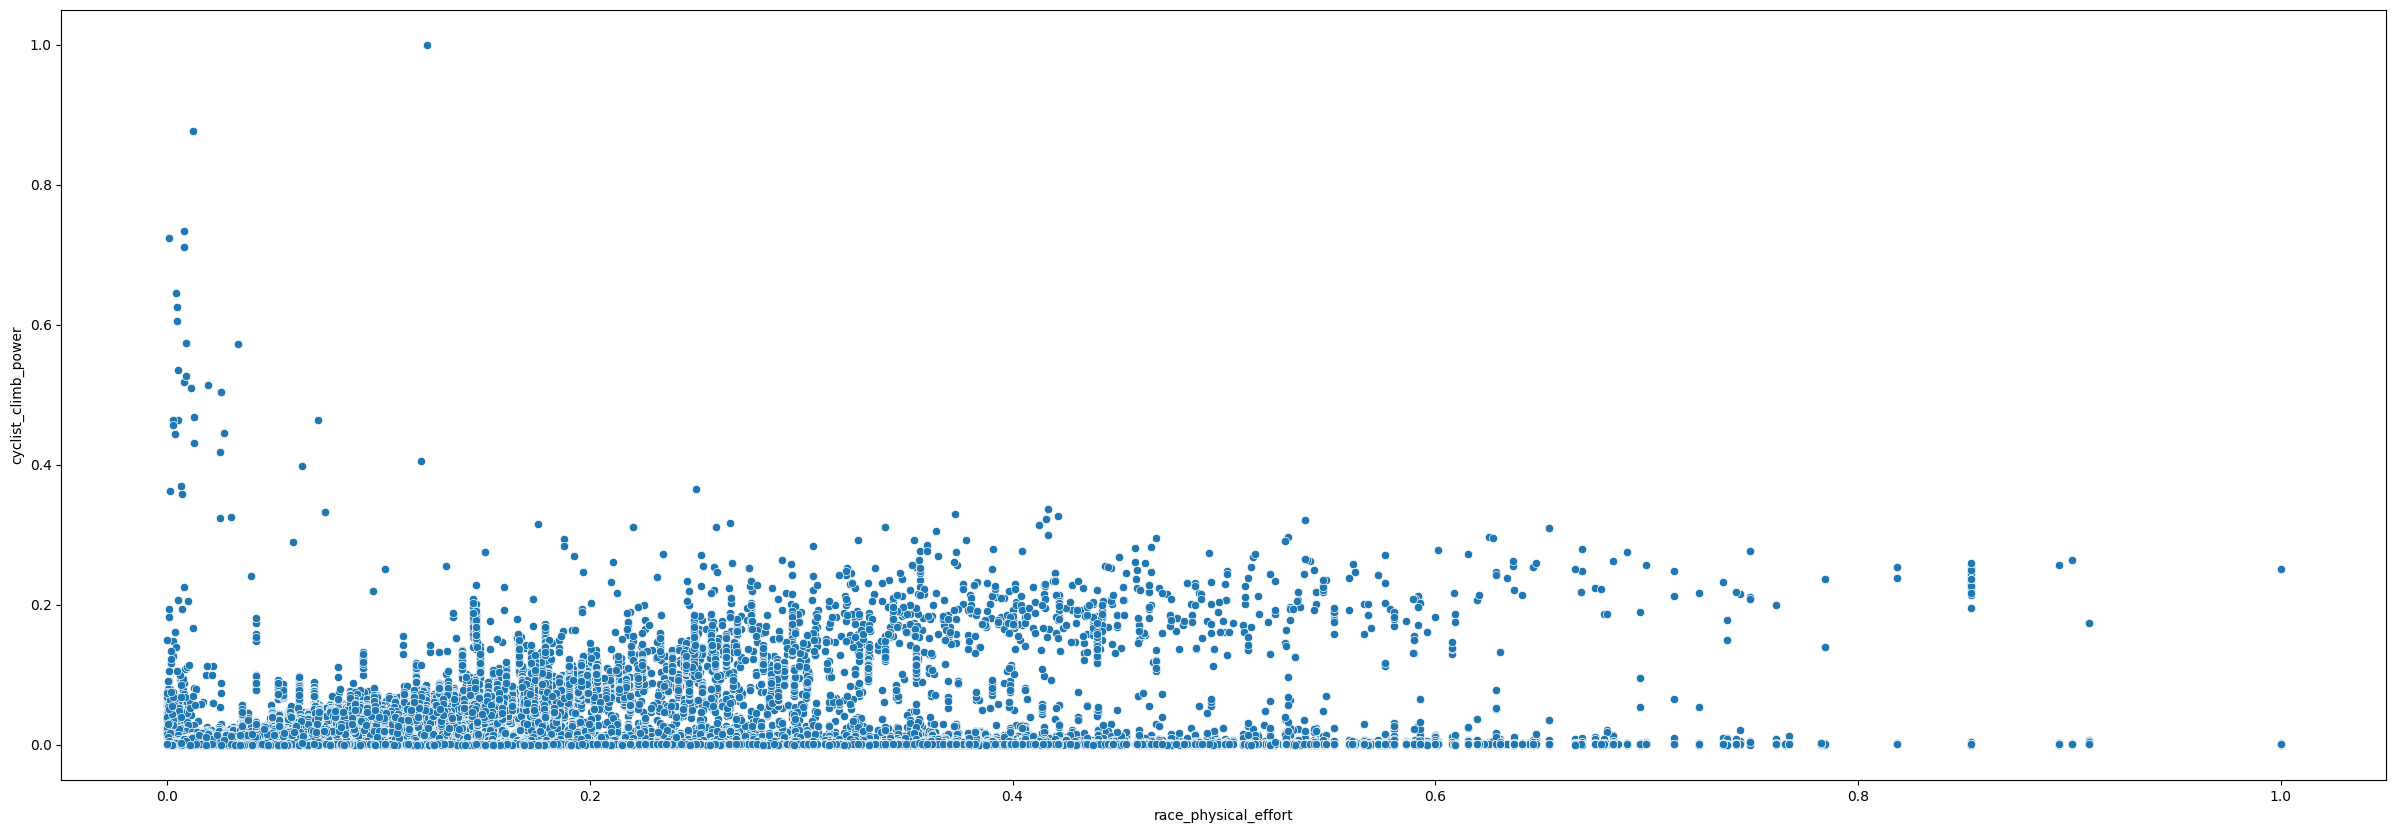

In [43]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='race_physical_effort', y='cyclist_climb_power', data=dataset)#[dataset['profile'] > 2])
plt.show()

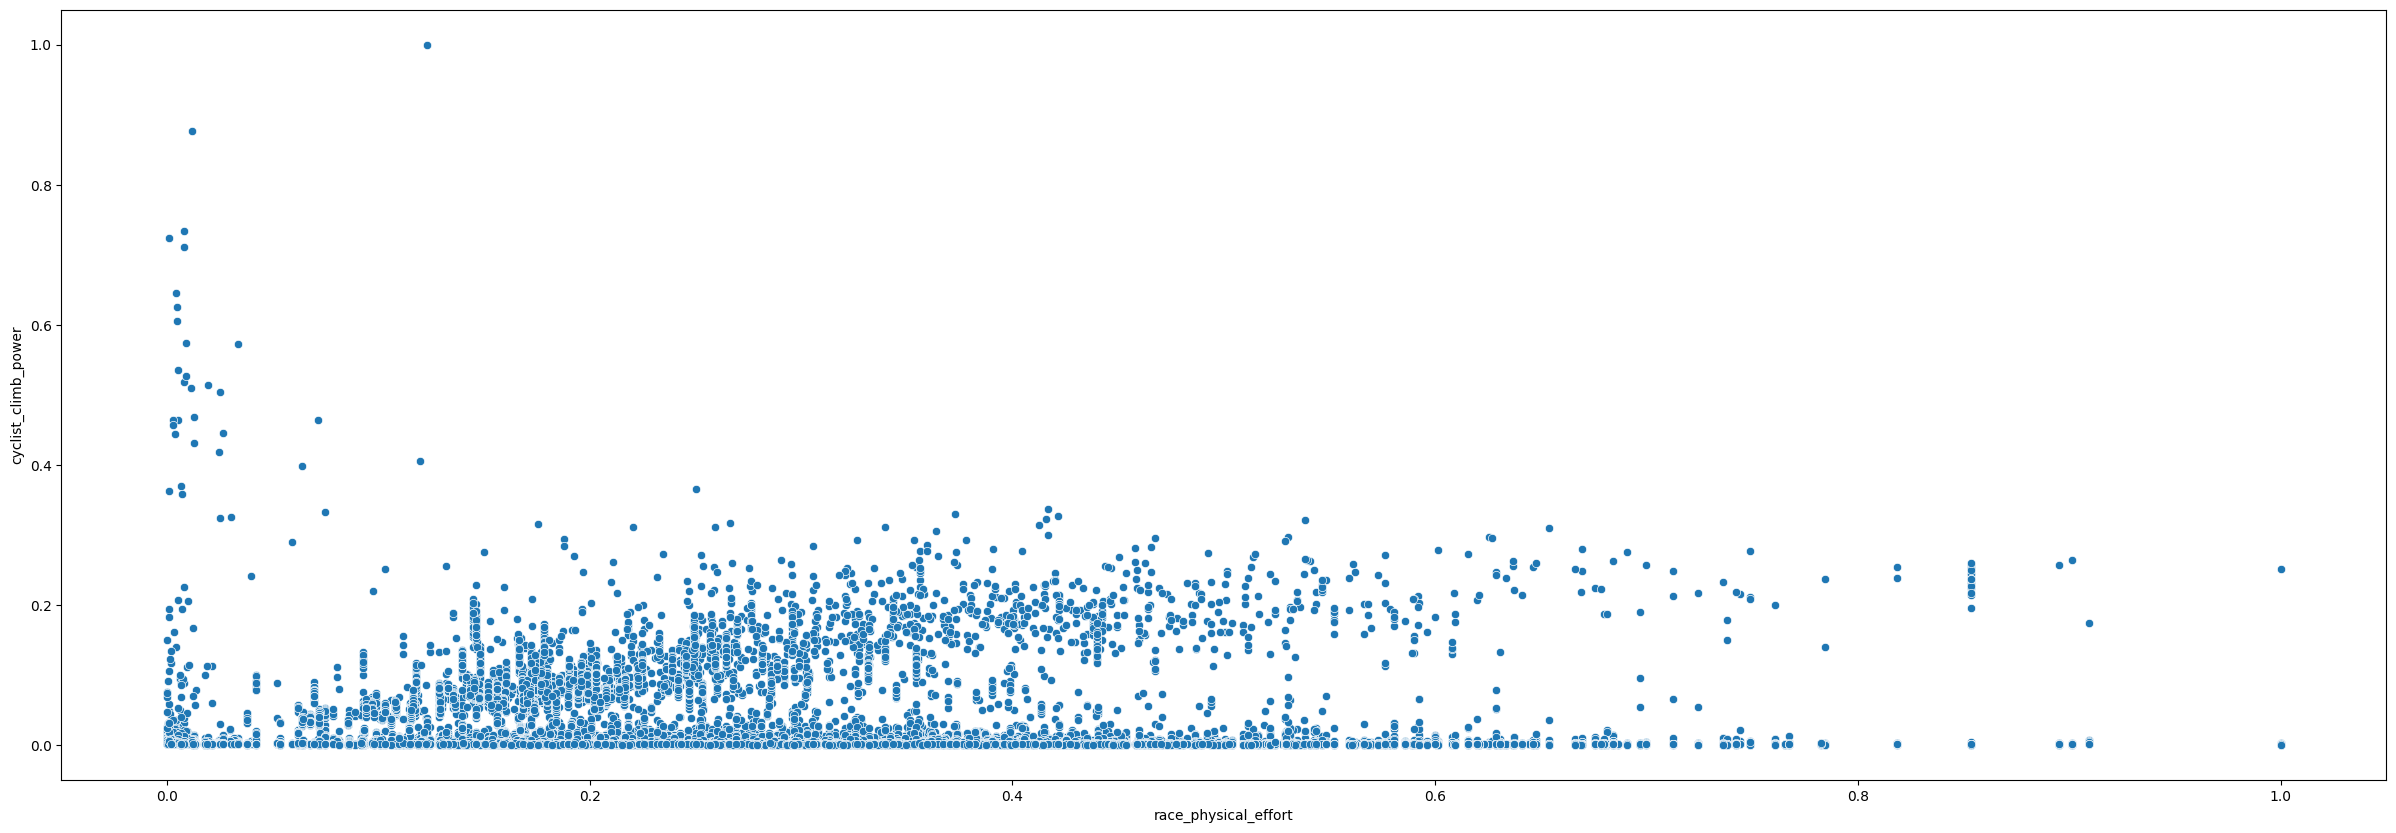

In [44]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='race_physical_effort', y='cyclist_climb_power', data=dataset[dataset['profile'] > 2])
plt.show()